In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Now we import our dataset into our jupternotebook

In [2]:
happy=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
happy.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Above dataset have no null values present

In [5]:
happy["Country"].duplicated().sum()

0

In [6]:
happy.duplicated().sum()

0

In [7]:
column=happy.columns
column

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [8]:
pd.value_counts(happy.Country).sum()

158

In [9]:
happy=happy.rename(columns={"Economy (GDP per Capita)":"Economy","Trust (Government Corruption)":"Corruption","Health (Life Expectancy)":"Health"})

In [10]:
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [11]:
pd.set_option('display.max_rows', None)


In [12]:
happy

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [13]:
happy["Region"].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

As we can see that from our dataset that Sub- saharan Africa region have more country with negative happiness as compare to Europe and american region 

In [14]:
# let's see how many country in Middle East and Northern Africa  lie

happy_MENA=happy[happy["Region"]=="Middle East and Northern Africa"]
happy_MENA

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
10,Israel,Middle East and Northern Africa,11,7.278,0.03470,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172,3.08854
19,United Arab Emirates,Middle East and Northern Africa,20,6.901,0.03729,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428,2.24743
21,Oman,Middle East and Northern Africa,22,6.853,0.05335,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542,2.47489
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
34,Saudi Arabia,Middle East and Northern Africa,35,6.411,0.04633,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706,2.43872
38,Kuwait,Middle East and Northern Africa,39,6.295,0.04456,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634
48,Bahrain,Middle East and Northern Africa,49,5.960,0.05412,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362,1.73797
62,Libya,Middle East and Northern Africa,63,5.754,0.07832,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295,2.09066
67,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528


In [15]:
MENA_column=happy_MENA[['Economy','Family','Health','Freedom','Corruption','Generosity']]
MENA_column

,Economy,Family,Health,Freedom,Corruption,Generosity
10,1.22857,1.22393,0.91387,0.41319,0.07785,0.33172
19,1.42727,1.12575,0.80925,0.64157,0.38583,0.26428
21,1.36011,1.08182,0.76276,0.63274,0.32524,0.21542
27,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573
34,1.39541,1.08393,0.72025,0.31048,0.32524,0.13706
38,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228
48,1.32376,1.21624,0.74716,0.45492,0.30600,0.17362
62,1.13145,1.11862,0.70380,0.41668,0.11023,0.18295
67,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822
75,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253


In [16]:
happy_LAC=happy[happy["Region"]=="Latin America and Caribbean"]
happy_LAC

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
11,Costa Rica,Latin America and Caribbean,12,7.226,0.04454,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,3.17728
13,Mexico,Latin America and Caribbean,14,7.187,0.04176,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
15,Brazil,Latin America and Caribbean,16,6.983,0.04076,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001
22,Venezuela,Latin America and Caribbean,23,6.810,0.06476,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
24,Panama,Latin America and Caribbean,25,6.786,0.04910,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434,2.84848
26,Chile,Latin America and Caribbean,27,6.670,0.05800,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,2.67585
29,Argentina,Latin America and Caribbean,30,6.574,0.04612,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451,2.83600
31,Uruguay,Latin America and Caribbean,32,6.485,0.04539,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240,2.32142
32,Colombia,Latin America and Caribbean,33,6.477,0.05051,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401,2.85737
39,Suriname,Latin America and Caribbean,40,6.269,0.09811,0.99534,0.97200,0.60820,0.59657,0.13633,0.16991,2.79094


In [17]:
LAC_column=happy_LAC[['Economy','Family','Health','Freedom','Corruption','Generosity']]
LAC_column

,Economy,Family,Health,Freedom,Corruption,Generosity
11,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497
13,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074
15,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574
22,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841
24,1.06353,1.19850,0.79661,0.54210,0.09270,0.24434
26,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363
29,1.05351,1.24823,0.78723,0.44974,0.08484,0.11451
31,1.06166,1.20890,0.81160,0.60362,0.24558,0.23240
32,0.91861,1.24018,0.69077,0.53466,0.05120,0.18401
39,0.99534,0.97200,0.60820,0.59657,0.13633,0.16991


In [18]:
happy_CEE=happy[happy["Region"]=="Central and Eastern Europe"]
happy_CEE

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
30,Czech Republic,Central and Eastern Europe,31,6.505,0.04168,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,2.67782
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.04361,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
44,Slovakia,Central and Eastern Europe,45,5.995,0.04267,1.16891,1.26999,0.78902,0.31751,0.03431,0.16893,2.24639
51,Moldova,Central and Eastern Europe,52,5.889,0.03799,0.59448,1.01528,0.61826,0.32818,0.01615,0.20951,3.10712
53,Kazakhstan,Central and Eastern Europe,54,5.855,0.04114,1.12254,1.12241,0.64368,0.51649,0.08454,0.11827,2.24729
54,Slovenia,Central and Eastern Europe,55,5.848,0.04251,1.18498,1.27385,0.87337,0.60855,0.03787,0.25328,1.61583
55,Lithuania,Central and Eastern Europe,56,5.833,0.03843,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649
58,Belarus,Central and Eastern Europe,59,5.813,0.03938,1.03192,1.23289,0.73608,0.37938,0.19090,0.11046,2.13090
59,Poland,Central and Eastern Europe,60,5.791,0.04263,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759,1.86565
61,Croatia,Central and Eastern Europe,62,5.759,0.04394,1.08254,0.79624,0.78805,0.25883,0.02430,0.05444,2.75414


In [19]:
CEE_column=happy_CEE[['Economy','Family','Health','Freedom','Corruption','Generosity']]
CEE_column

,Economy,Family,Health,Freedom,Corruption,Generosity
30,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686
43,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837
44,1.16891,1.26999,0.78902,0.31751,0.03431,0.16893
51,0.59448,1.01528,0.61826,0.32818,0.01615,0.20951
53,1.12254,1.12241,0.64368,0.51649,0.08454,0.11827
54,1.18498,1.27385,0.87337,0.60855,0.03787,0.25328
55,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641
58,1.03192,1.23289,0.73608,0.37938,0.19090,0.11046
59,1.12555,1.27948,0.77903,0.53122,0.04212,0.16759
61,1.08254,0.79624,0.78805,0.25883,0.02430,0.05444


As you can see that in middle east and northern africa  region there are 6 country country which is under 100 rank for happiness restotherwise we see from this region there are country which is not good in happiness report

In [20]:
corruption_by_region = happy.groupby('Region')['Corruption'].mean().sort_values(ascending=False)
corruption_by_region

Region
Australia and New Zealand          0.392795
North America                      0.244235
Western Europe                     0.231463
Middle East and Northern Africa    0.181702
Southeastern Asia                  0.151276
Eastern Asia                       0.127695
Sub-Saharan Africa                 0.123878
Latin America and Caribbean        0.117172
Southern Asia                      0.102536
Central and Eastern Europe         0.086674
Name: Corruption, dtype: float64

In [21]:
happy.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


As we can see that there is not much difference between 3rd quartile and max so maybe outliers are not present but we have to check

In [22]:
happy["Economy"].describe()

count    158.000000
mean       0.846137
std        0.403121
min        0.000000
25%        0.545808
50%        0.910245
75%        1.158448
max        1.690420
Name: Economy, dtype: float64

# Now we will do Data Visulization to find out relation and see what facor                 affecting country happiness score and rankink

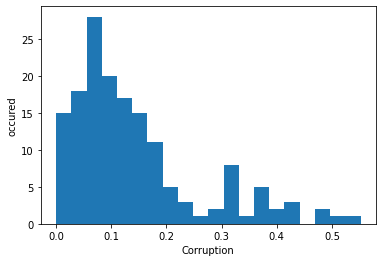

In [23]:
#Let's first use hist plot 
plt.hist(happy["Corruption"],bins=20)
plt.xlabel("Corruption")
plt.ylabel("occured")
plt.show()

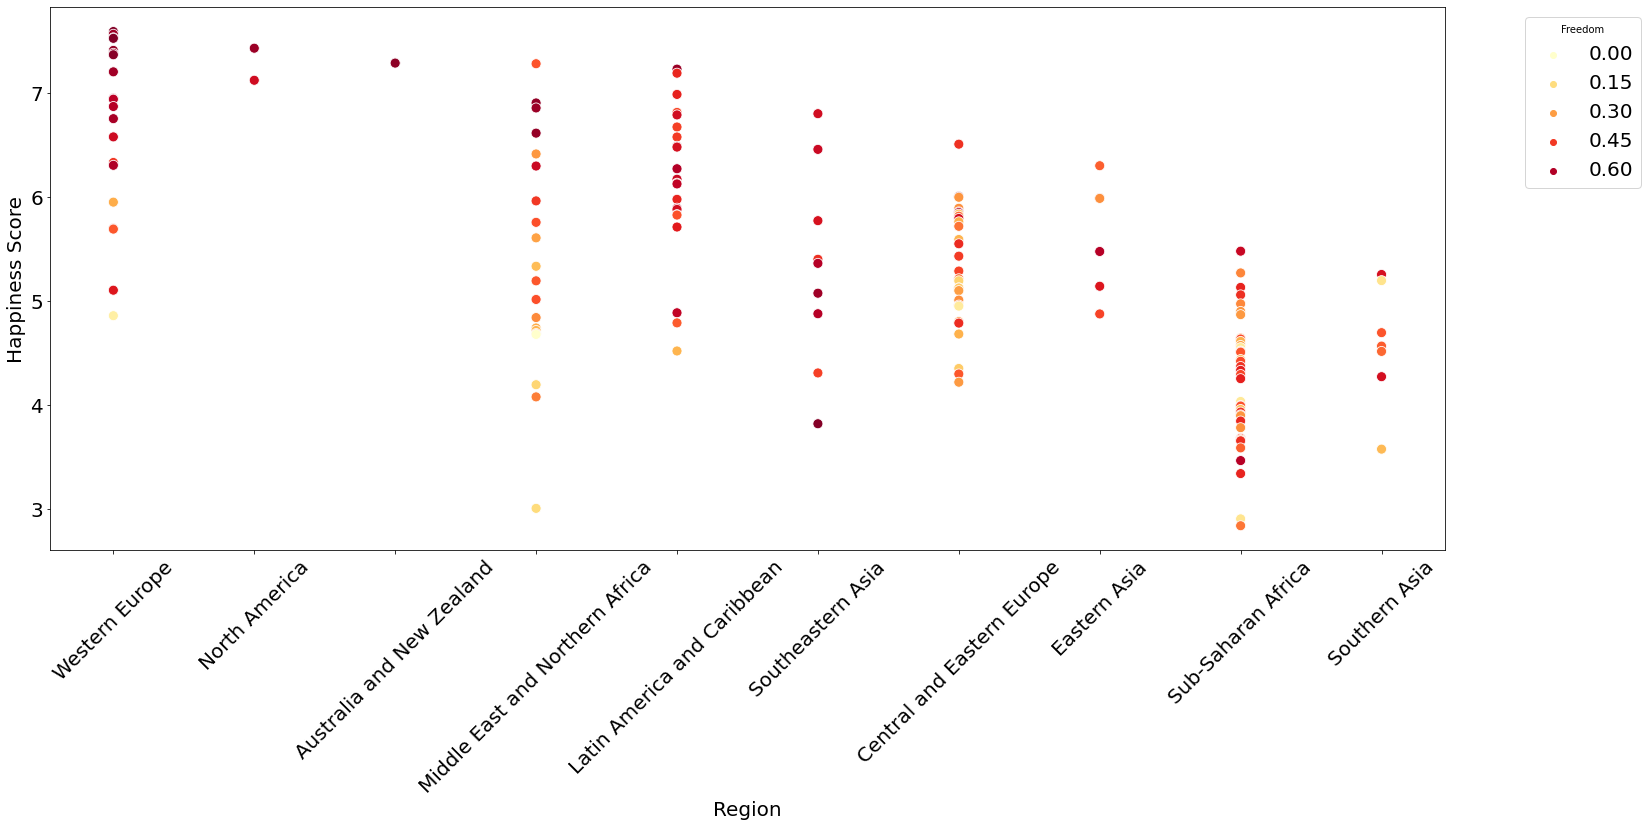

In [24]:
plt.figure(figsize=(25,10))
ax=sns.scatterplot(y=happy['Happiness Score'],x=happy['Region'],hue="Freedom",data=happy,palette="YlOrRd",s=100)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel("Happiness Score",fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.legend(title='Freedom', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.show()

 As you can see From the Scatterplot clearly that "Western Europe" region hvaing high happines score but also very dark dot      showing us that "Freedom" score is also very high in this region followed by "North America" some country part of region 
"Middle East and Northern Africa" & "Autraliia and New Zeland" 

Now it is also cleared Some part of "southern asia" is having happiness score as freedom is also good than "Africa" and "southeast asia" region  but other part "Eastern asia", "Sub- Saharn Africa", "Central and eatern Europe", all these having not good score in freedom that;s why happiness score is also low we can see from graph 

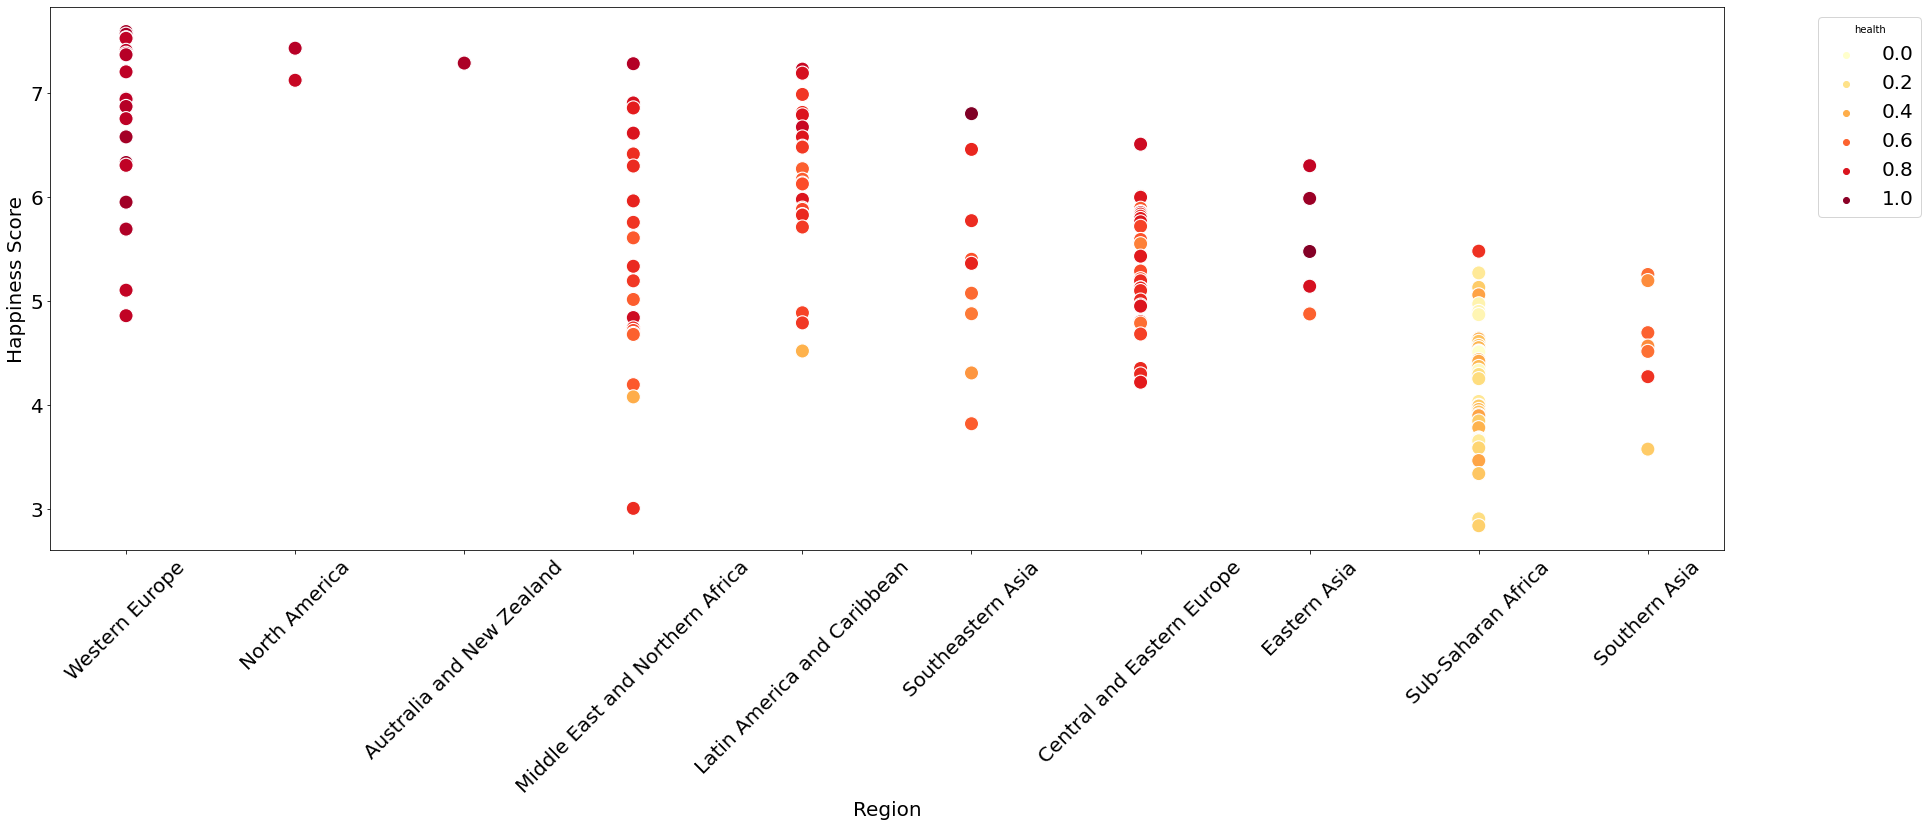

In [25]:
plt.figure(figsize=(30,10))
ax=sns.scatterplot(y=happy['Happiness Score'],x=happy['Region'],hue="Health", data=happy,palette="YlOrRd",s=200)
plt.legend(title='health', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel("Happiness Score",fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.show()

As you can see western Europe , North America, Eastern Asia these four region is having better health score and having happiness score and ranking is Good than other region from we can come to conclusion that health is one of ther Major key factor in deciding the happiness ranking of the country

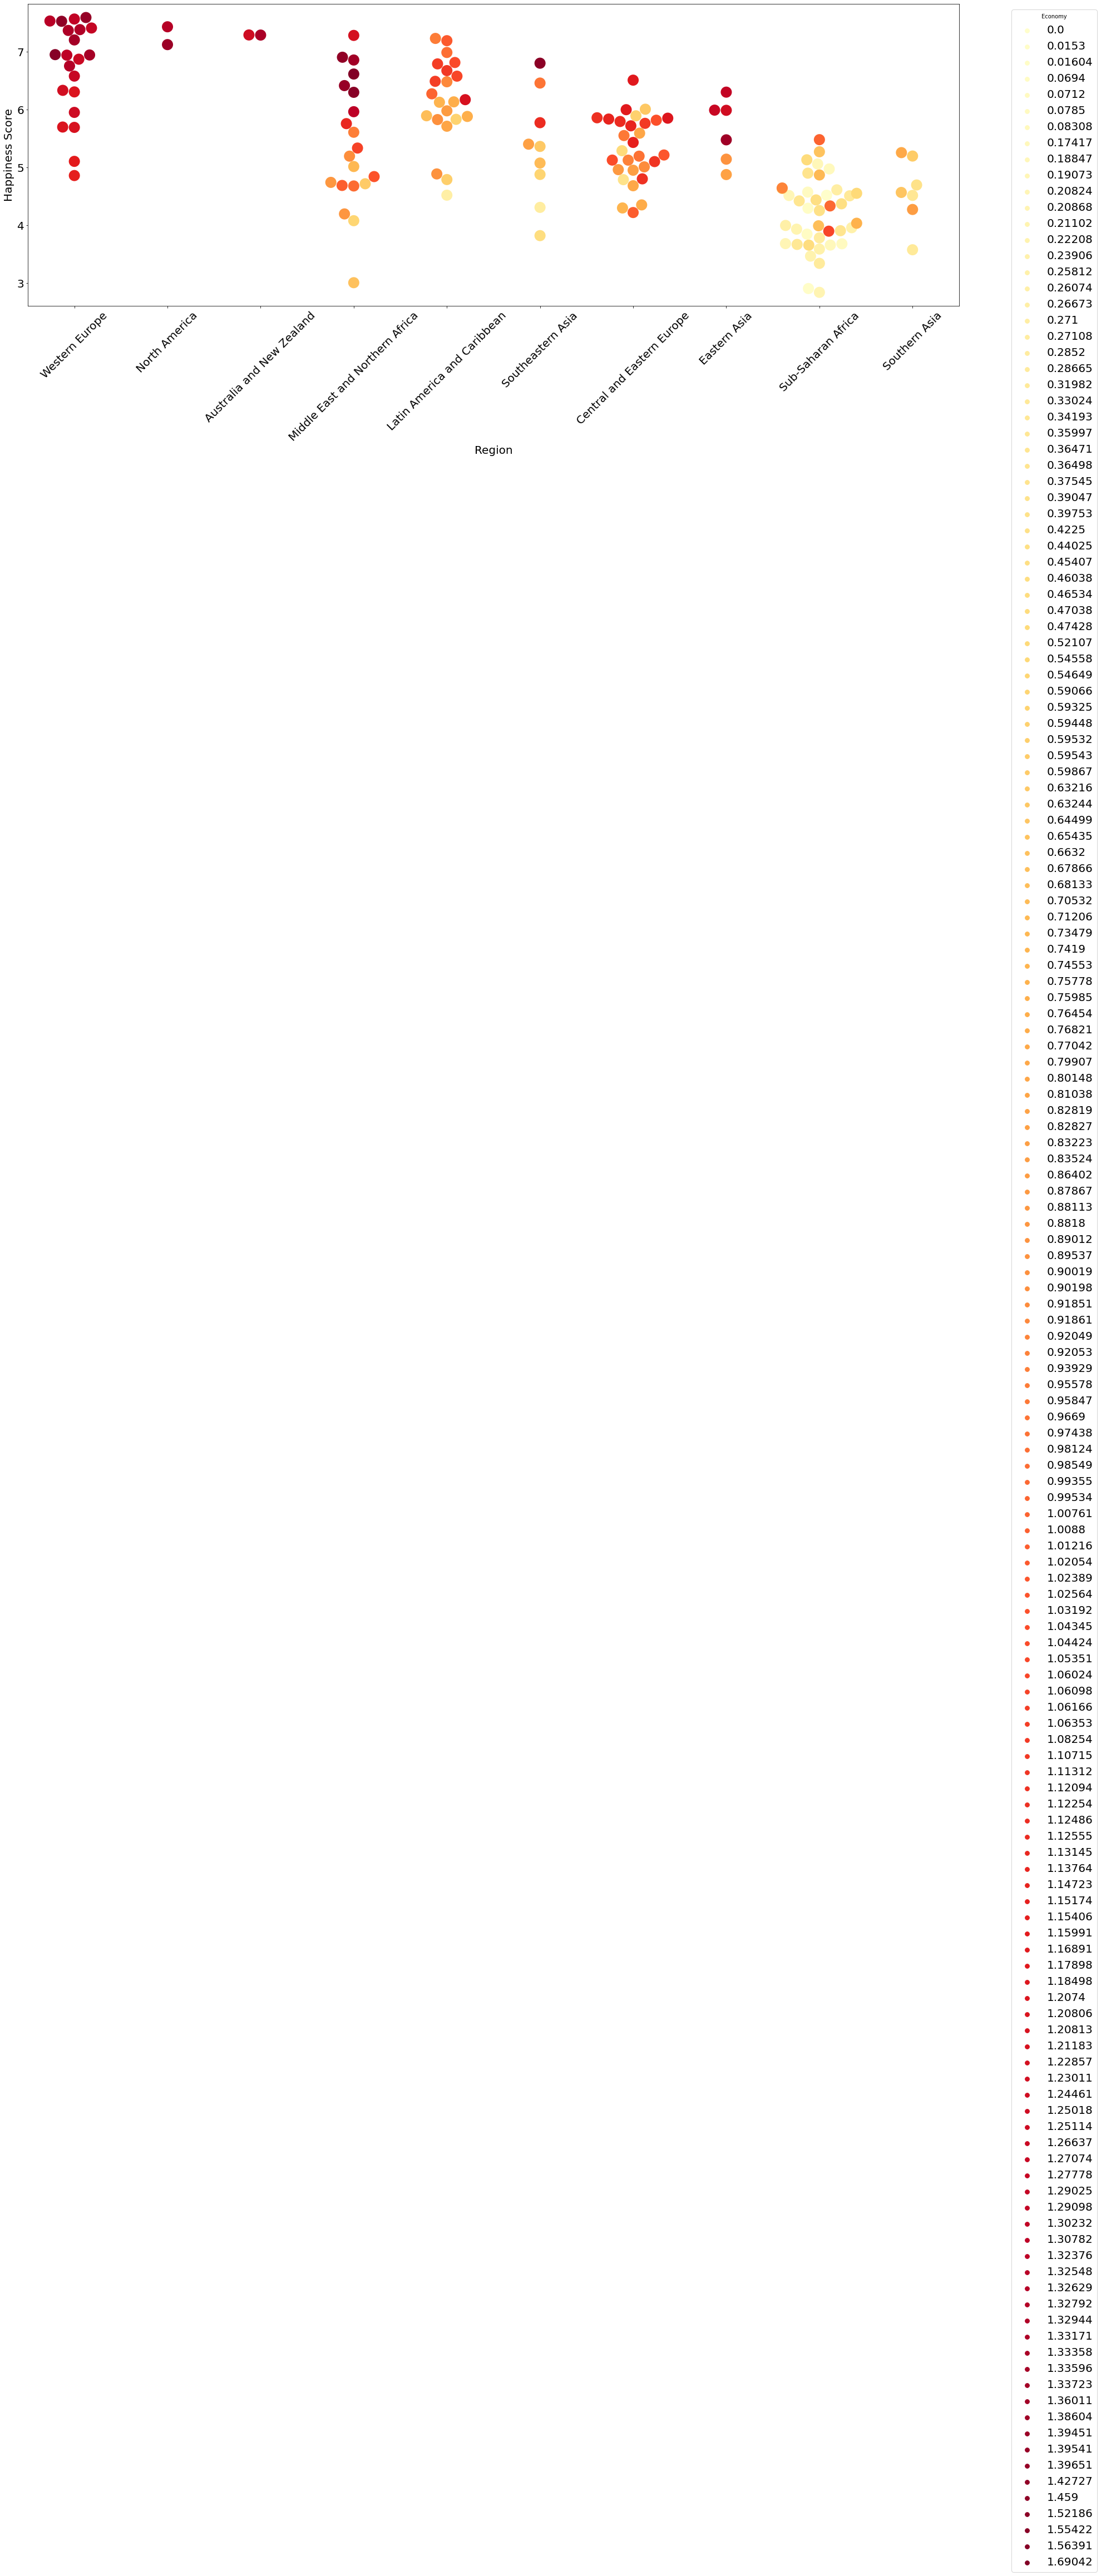

In [26]:
plt.figure(figsize=(30,10))
ax=sns.swarmplot(y=happy['Happiness Score'],x=happy['Region'],hue="Economy", data=happy,palette="YlOrRd",s=20)
plt.legend(title='Economy', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.ylabel("Happiness Score",fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.show()

As we can Clearly see that as usual "Western", "North American", "Australlia and New zeland", some country of " Midddle east and carribiean" , "Latin America", "north America" and few country of "southeastern Asia" having good economy than other region so economy also affecting the happiness score of these nation because if country economy will be good person living standard and affordability to things also increases so people of these nation will be happy 

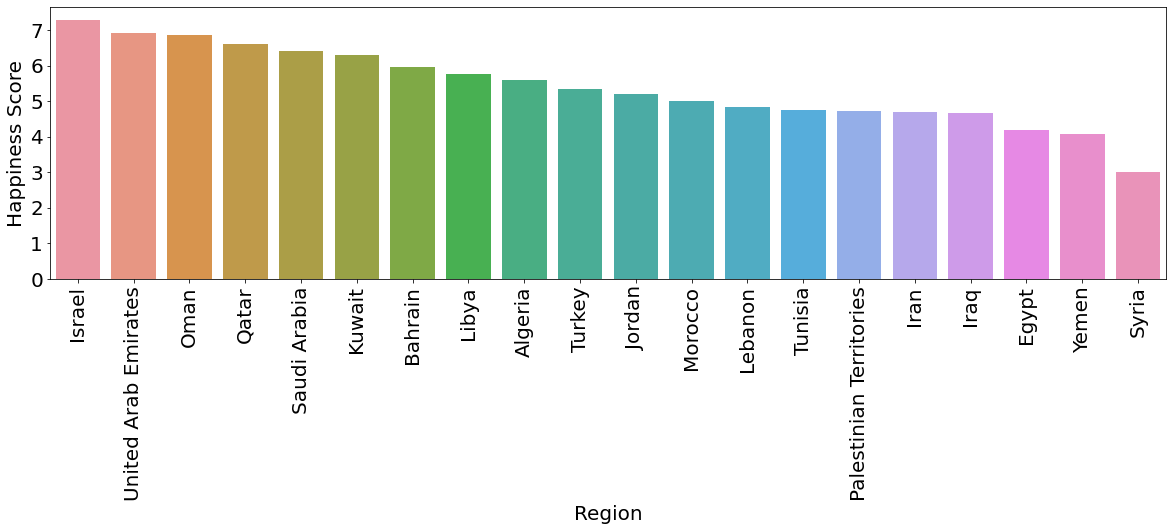

In [27]:
# lets use count plot see Middle East and Northern Africa 
plt.figure(figsize=(20,5))
ax=sns.barplot(y=happy_MENA['Happiness Score'],x=happy_MENA["Country"])
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.ylabel("Happiness Score",fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.show()

As we can Middle East and Northern Africa from Israel to libya they are having good happiness score but left country not 

As we can see the all key parameter of # let's check all parameter which telling in 
 that 
1. Economy :
   In economy we can see that from "israel" to "libya" middle east and one north Africa country performing wel,l mean there        people are happy
2. Corruption:
   In corruption we can see "Isreal" is performing very good but  "Quatar" ,"UAE", "OMAN"is performing very Bad
3. Freedom:
    in Freedom we can see that Israel again performing bad as compare to other top 6 country of happiness score "Middle East and    Northern Africa" on other hand " UAE", "OMAN", "Quatar" are performing good in Freedom
4. Health:
    In terms of health "Isreal" is havinh highest and offcurse "yemen" having less due to internal war crisis
5. Family:
   In terms of Family "Ireal" to "Libya" performing very well 
   
From out of 5 parametrer  parameter Israel performig good so that why Israel ranking is better than other in t regionhis " Middle East and Northern Africa" region
 

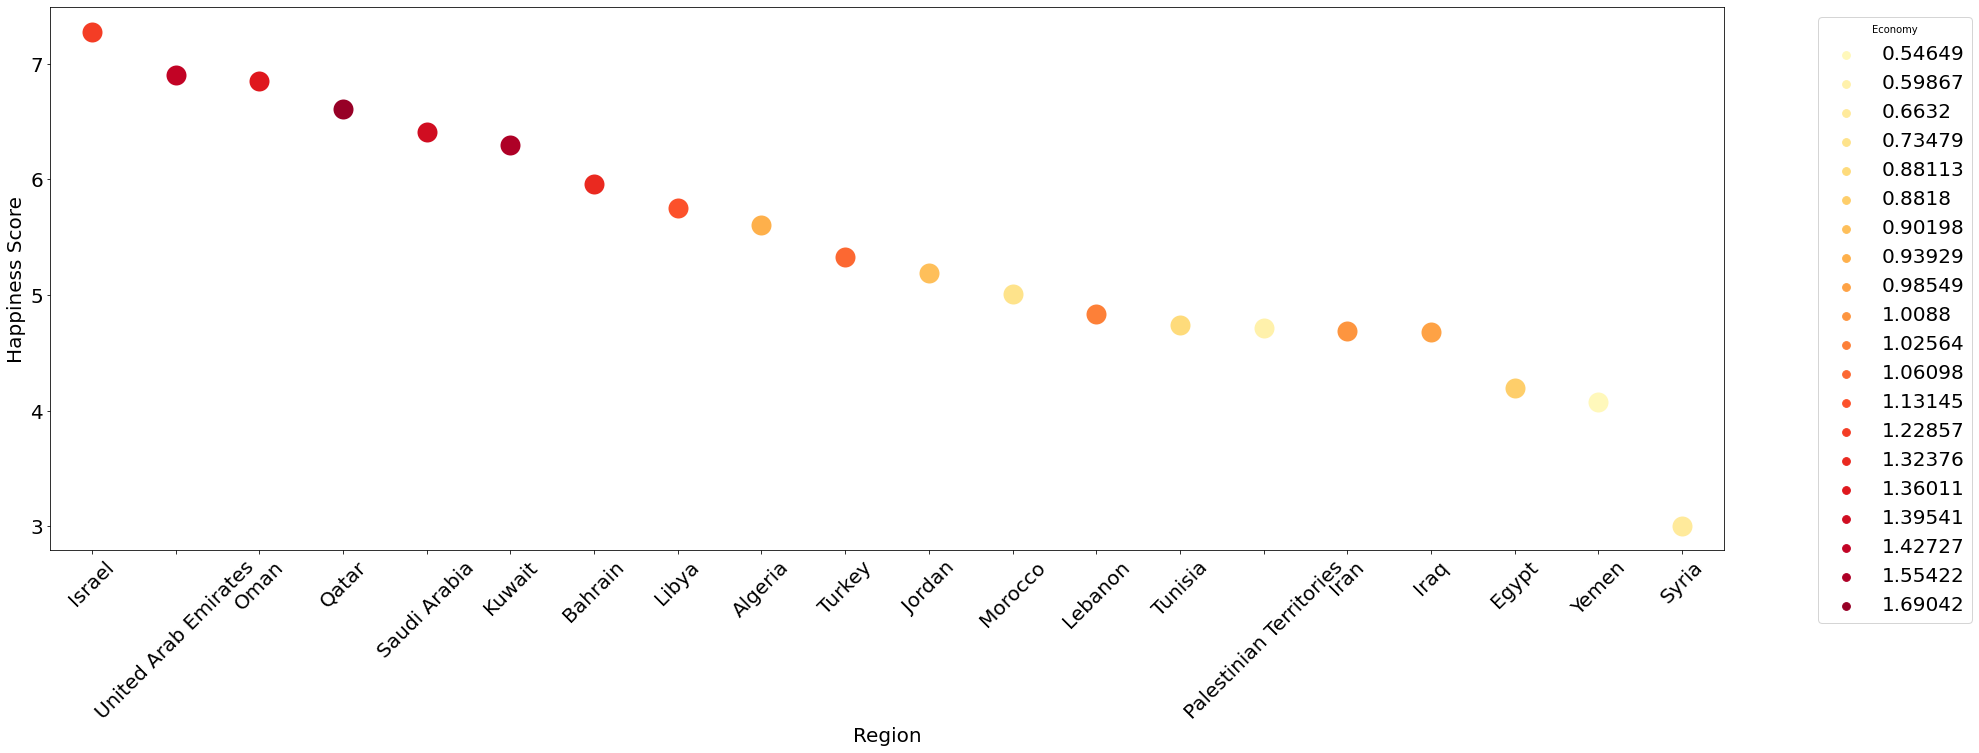

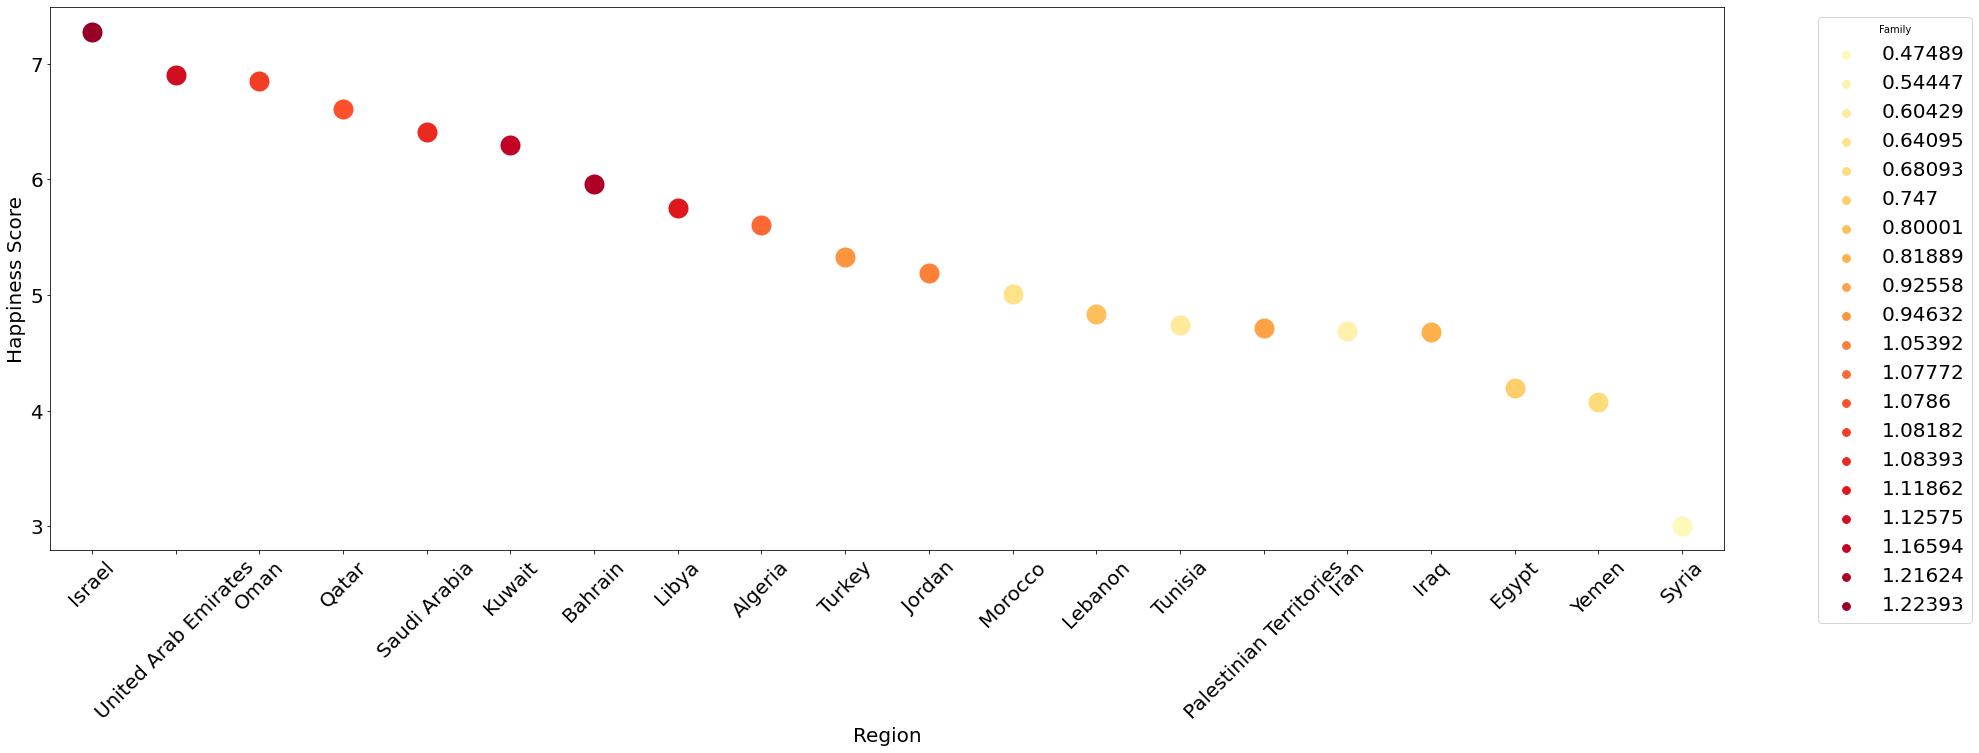

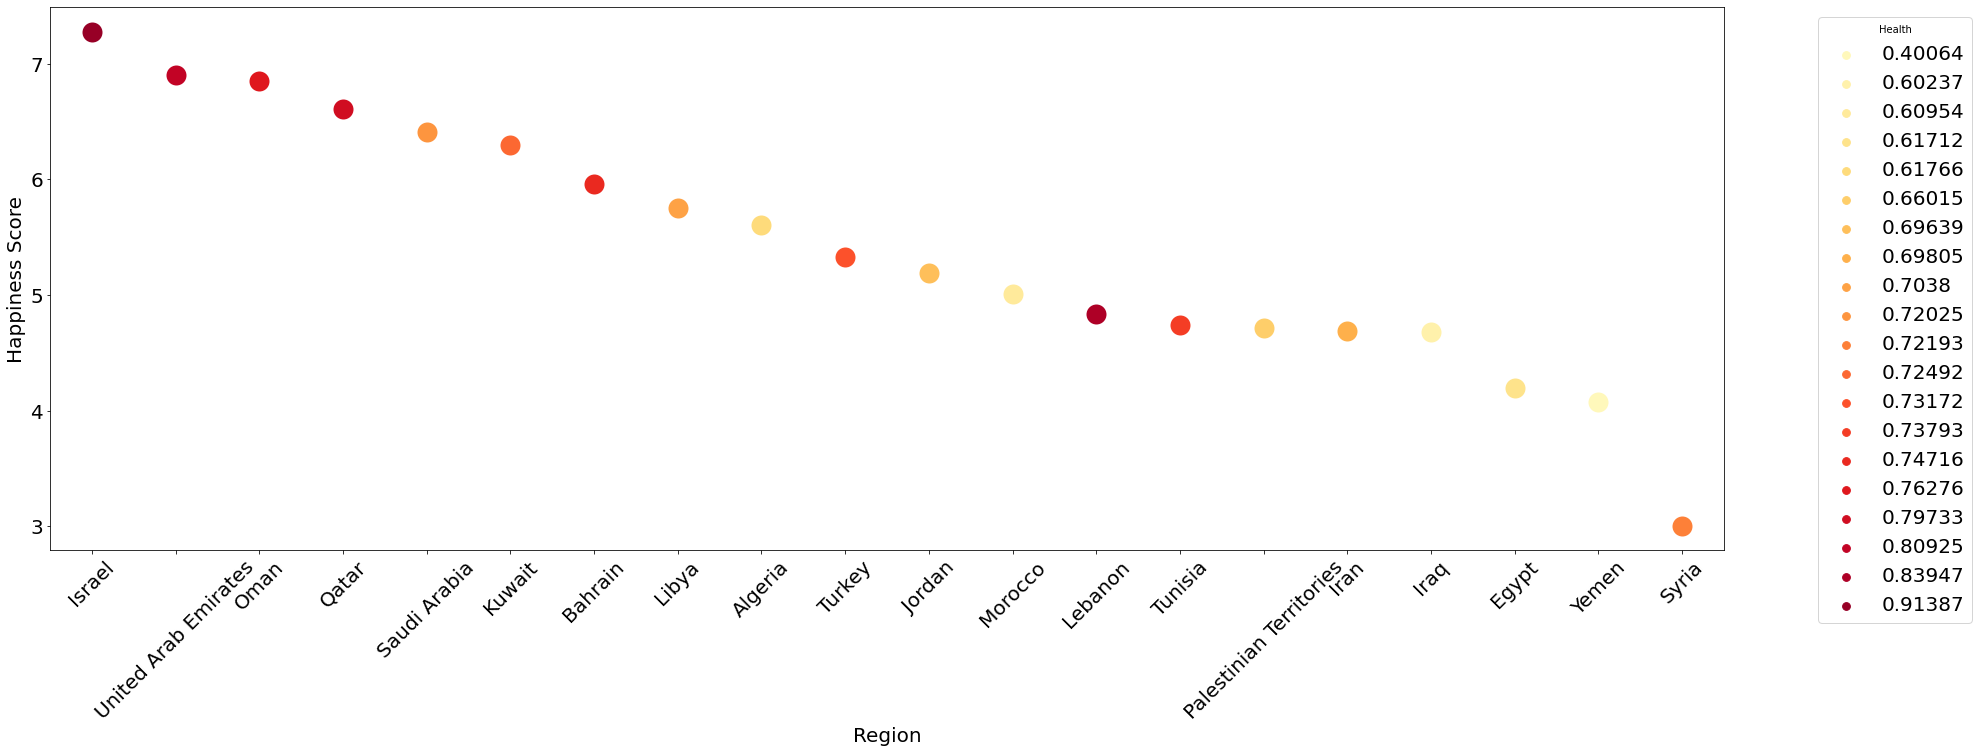

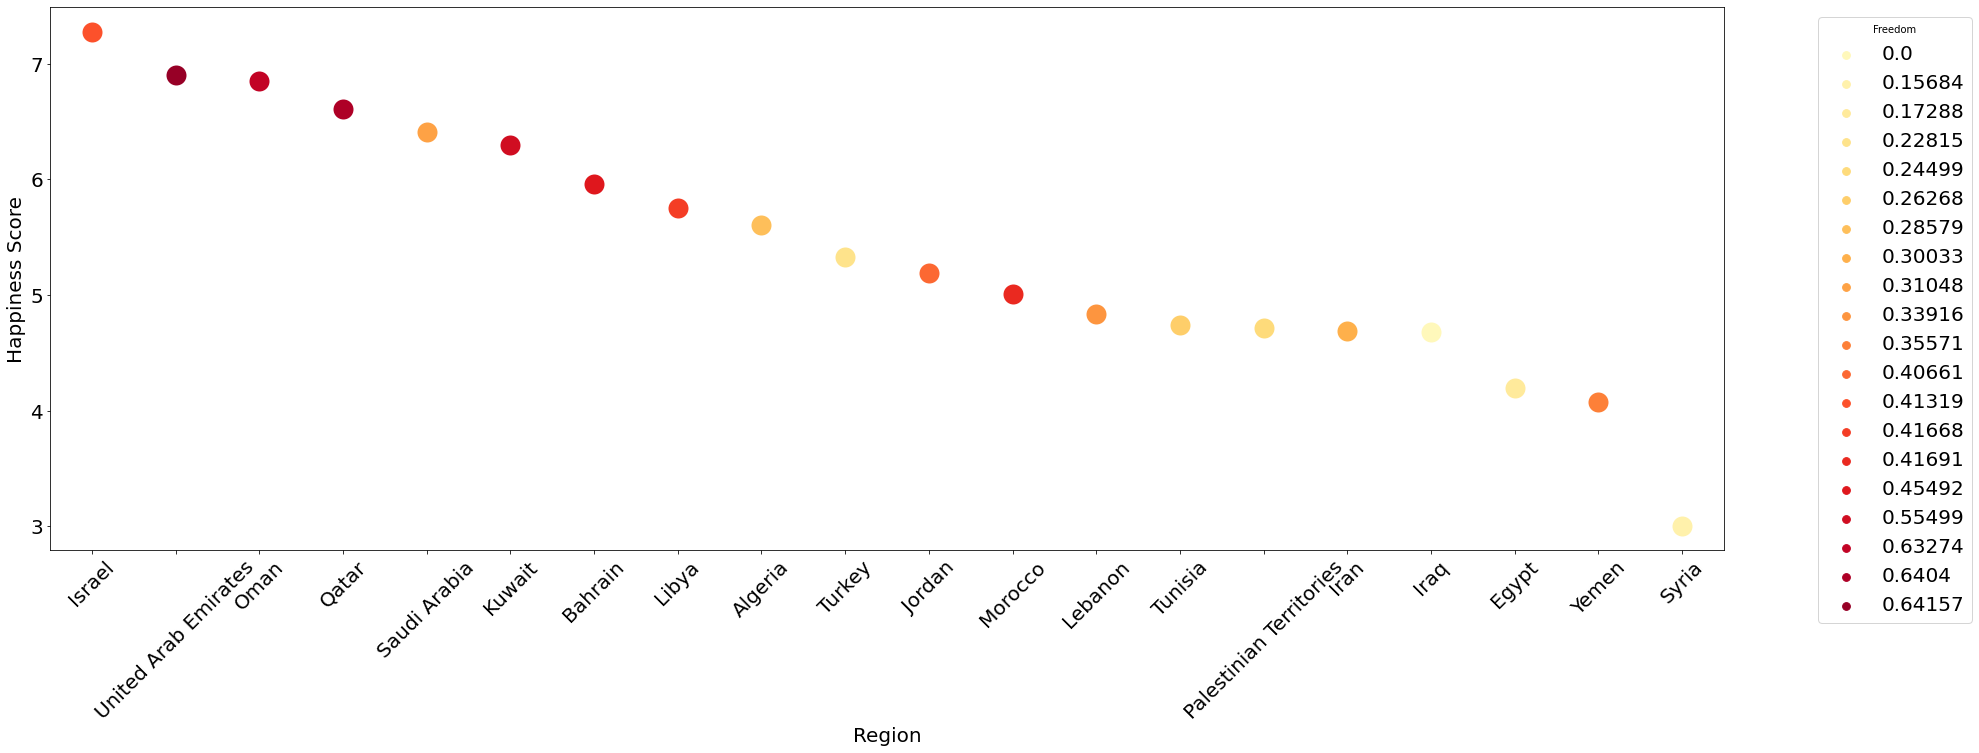

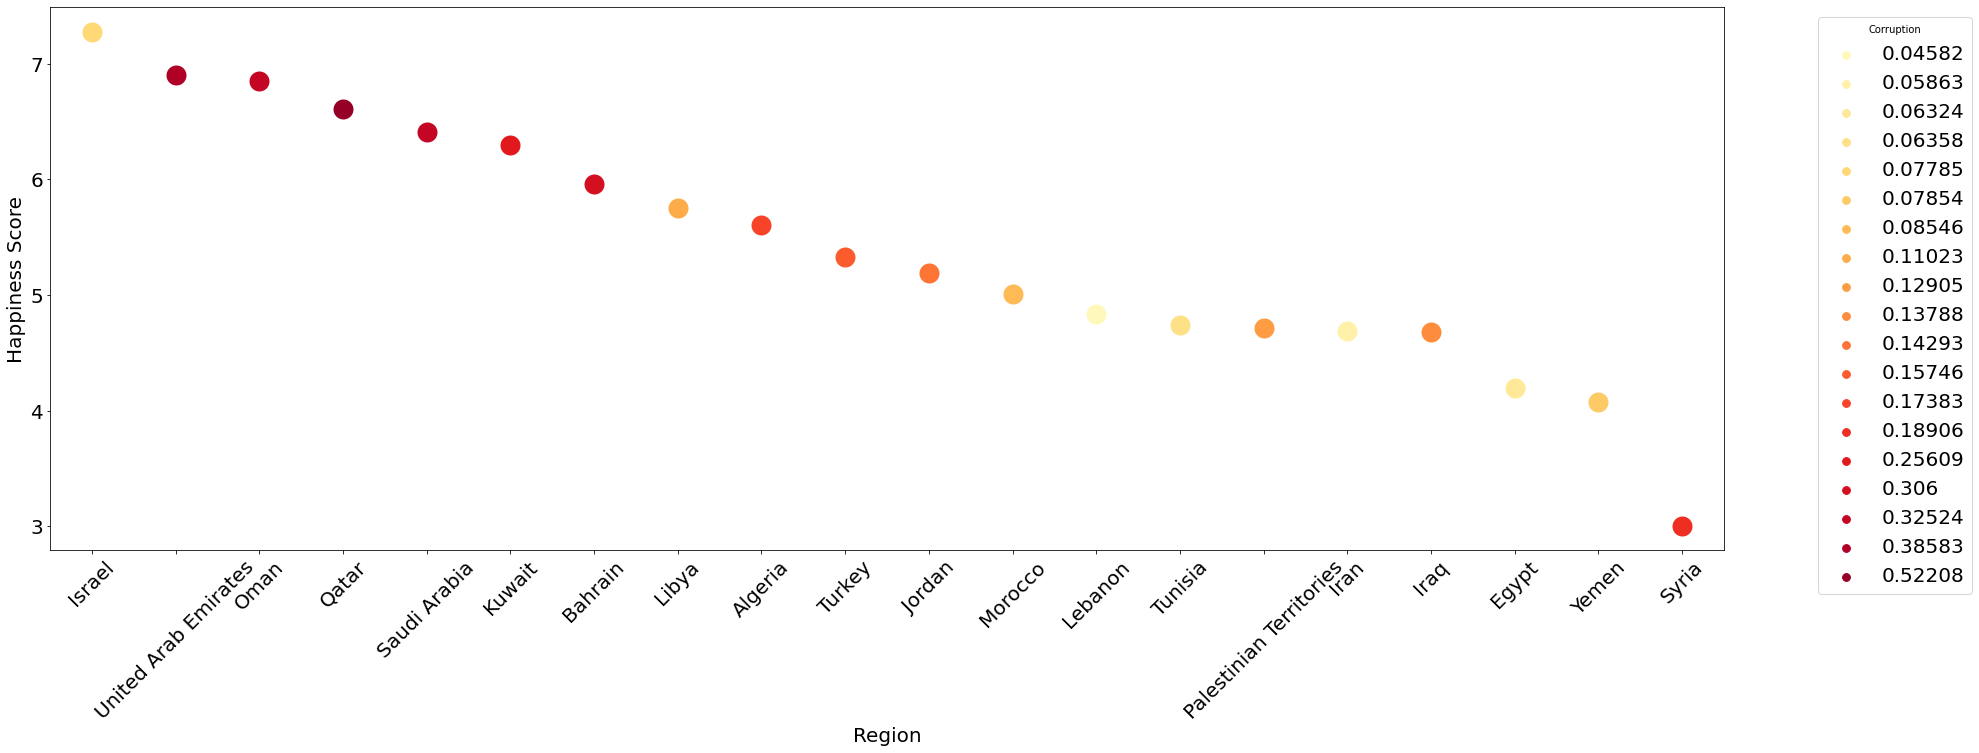

In [ ]:
# let's check all parameter which telling in  " Middle East and Northern Africa" why Israel have good Happiness score than other 
for i in MENA_column:
    plt.figure(figsize=(30,10))
    ax=sns.swarmplot(y=happy_MENA['Happiness Score'],x=happy_MENA["Country"],hue=i, data=happy_MENA,palette="YlOrRd",s=20)
    plt.legend(title=i, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
    plt.xticks(fontsize=20,rotation=45)
    plt.yticks(fontsize=20)
    plt.ylabel("Happiness Score",fontsize=20)
    plt.xlabel("Region",fontsize=20)
    plt.show()


As we can see the all key parameter of " Middle East and Northern Africa" that 
1. Economy :
   In economy we can see that from "israel" to "libya" middle east and one north Africa country performing wel,l mean there        people are happy
2. Corruption:
   In corruption we can see "Isreal" is performing very good but  "Quatar" ,"UAE", "OMAN"is performing very Bad
3. Freedom:
    in Freedom we can see that Israel again performing bad as compare to other top 6 country of happiness score "Middle East and    Northern Africa" on other hand " UAE", "OMAN", "Quatar" are performing good in Freedom
4. Health:
    In terms of health "Isreal" is havinh highest and offcurse "yemen" having less due to internal war crisis
5. Family:
   In terms of Family "Ireal" to "Libya" performing very well 
   
From out of 5 parametrer 4 parameter Israel performig good so that why Israel ranking is better than other in t regionhis " Middle East and Northern Africa" region

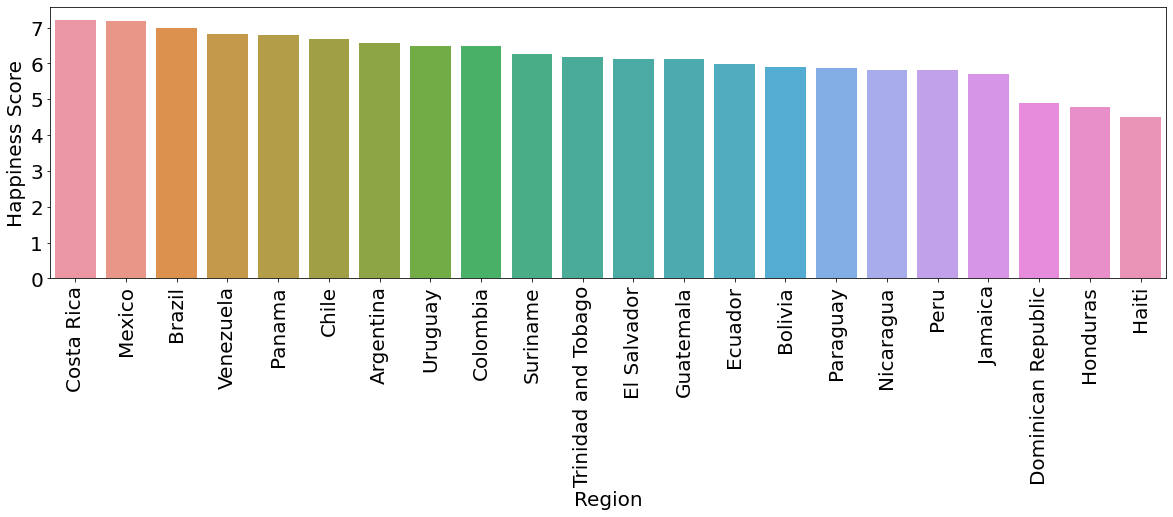

In [29]:
# lets use count plot see  " Latin America and Carribean" 
plt.figure(figsize=(20,5))
ax=sns.barplot(y=happy_LAC['Happiness Score'],x=happy_LAC["Country"])
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.ylabel("Happiness Score",fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.show()

# As an very "interseting fact" from this above "Latin America and carribean " we observed that From 22 country in this region out of which 18 country above happiness score > 6 which is very Good 

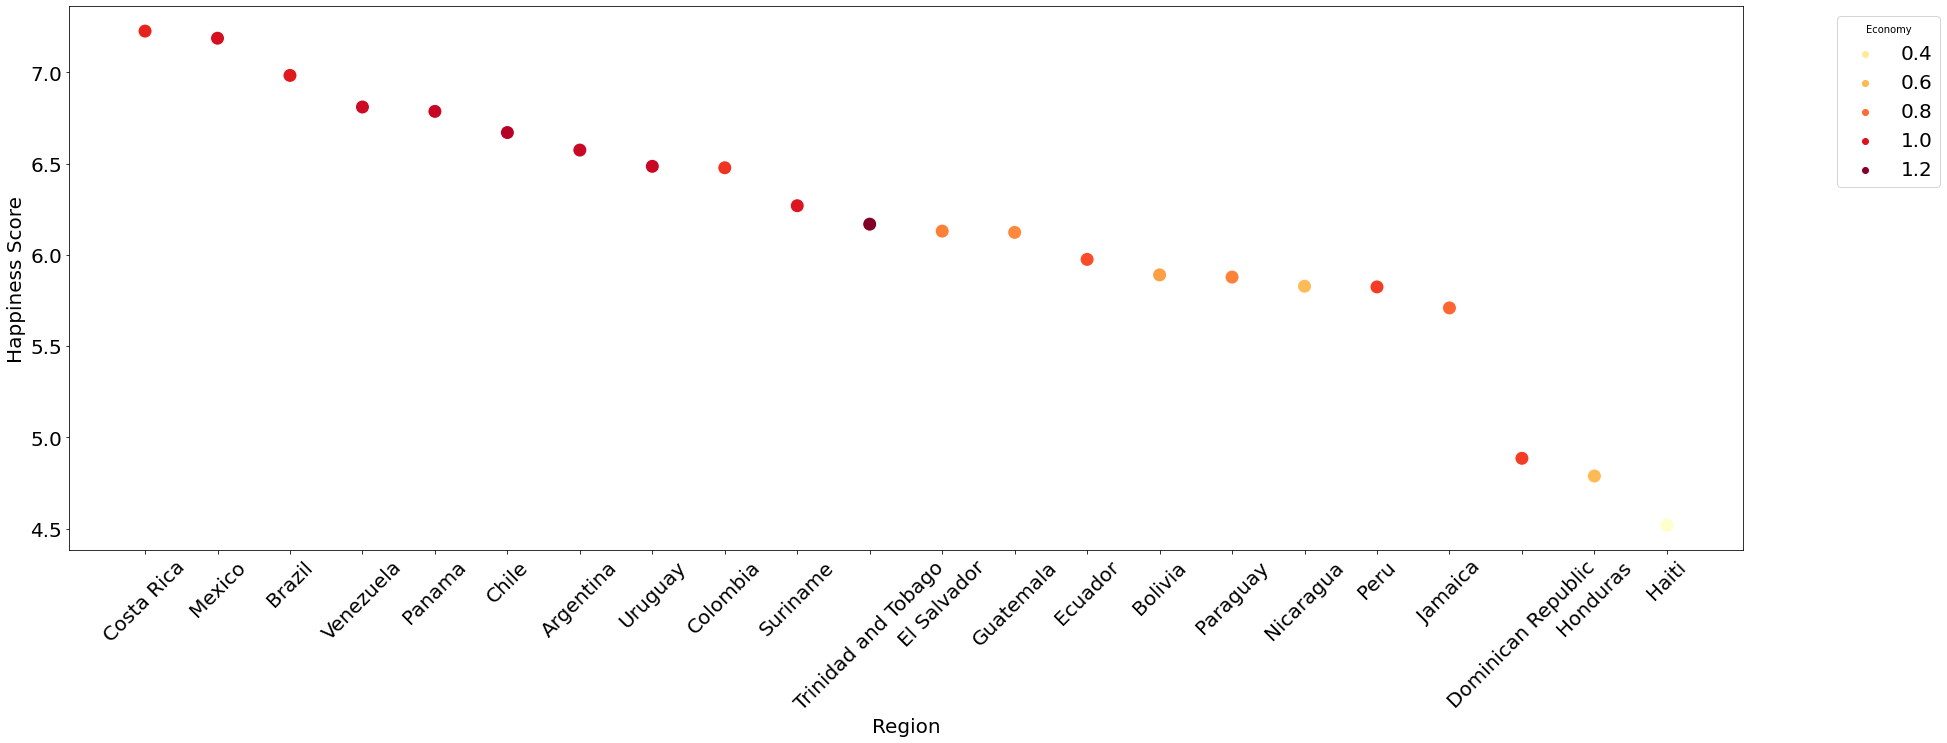

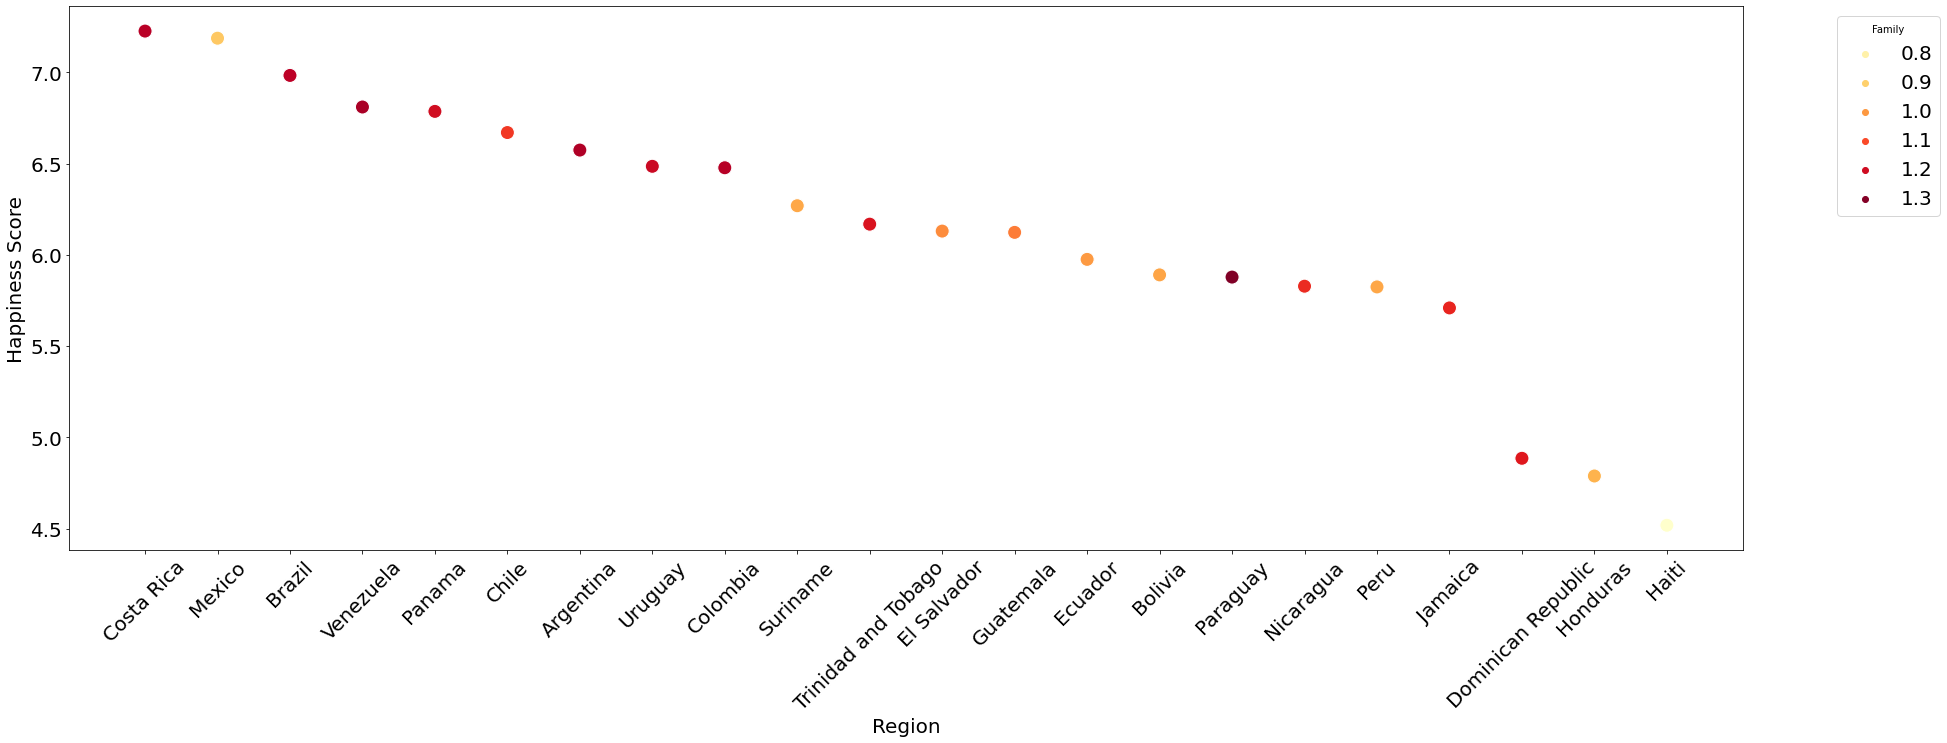

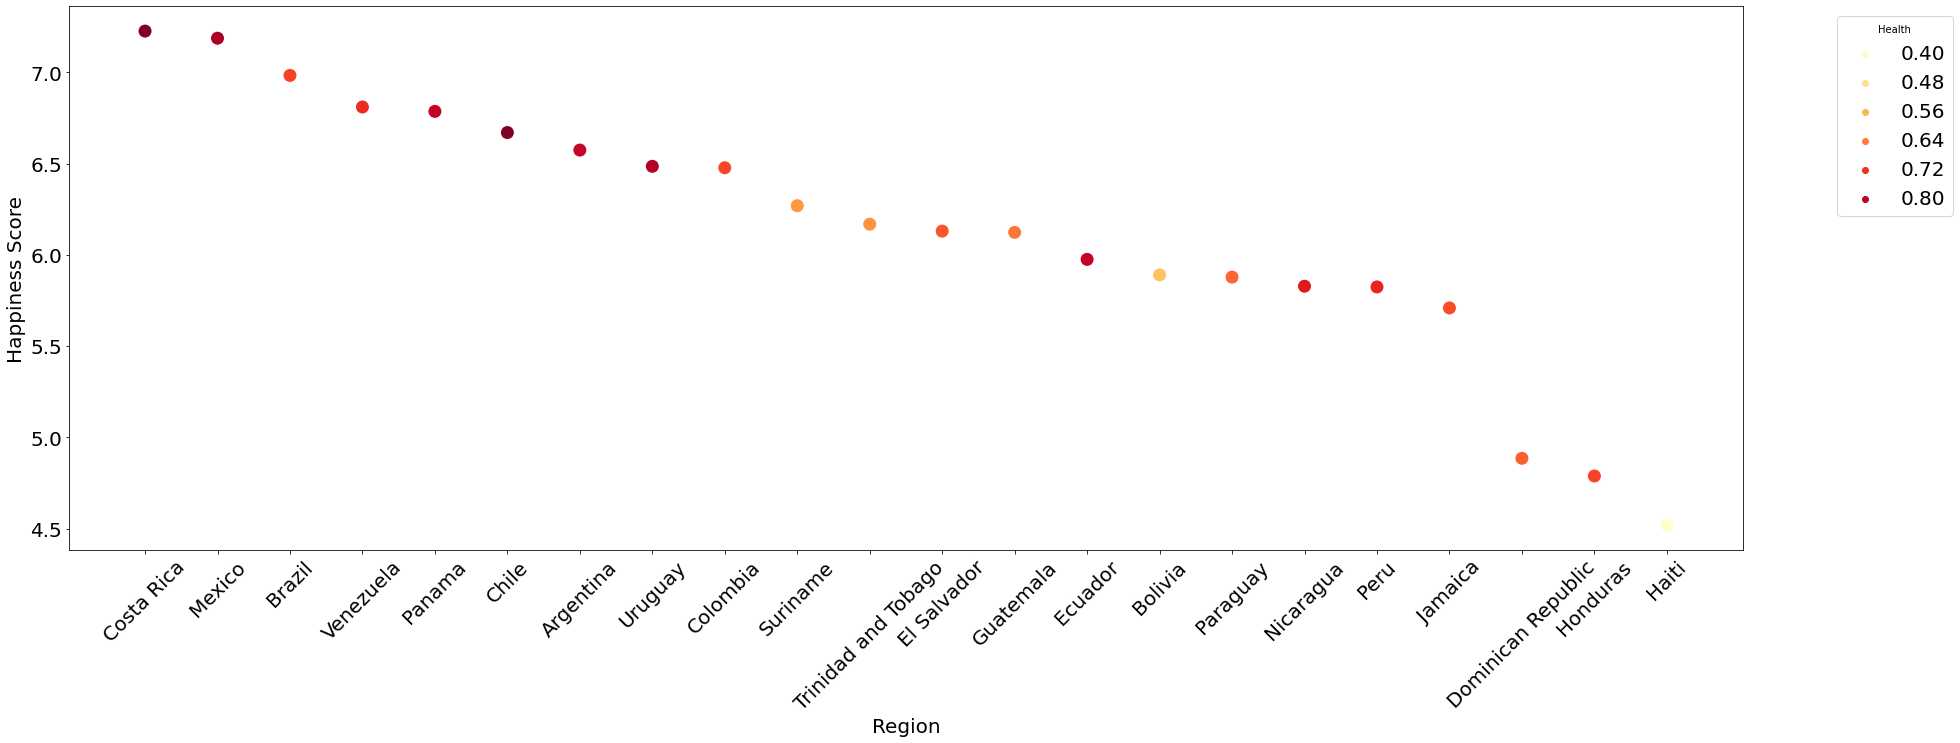

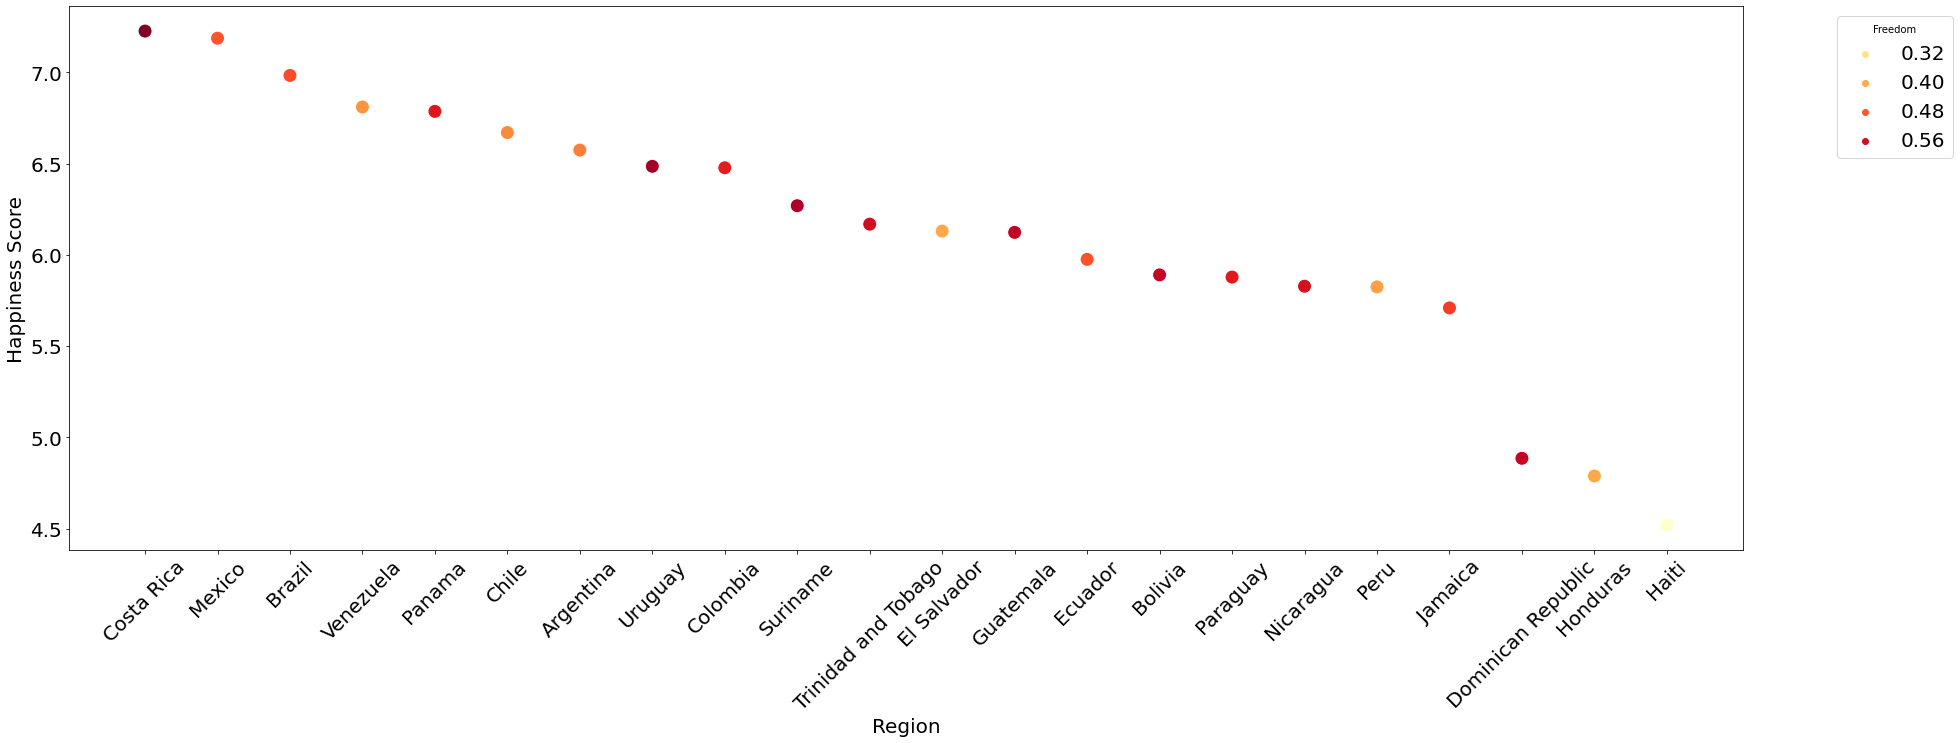

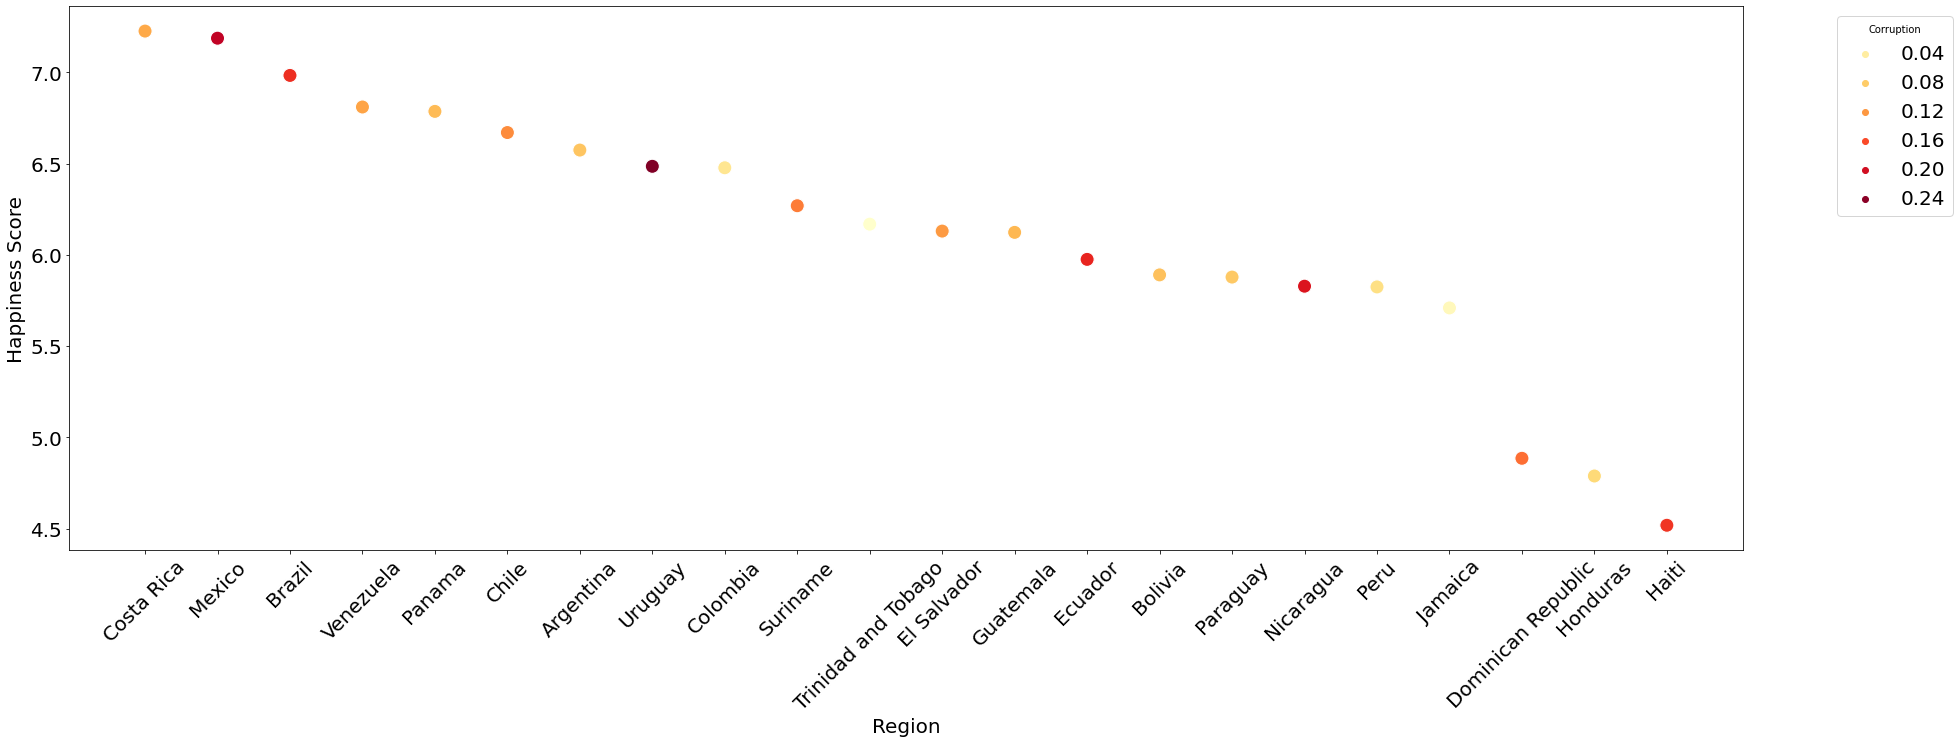

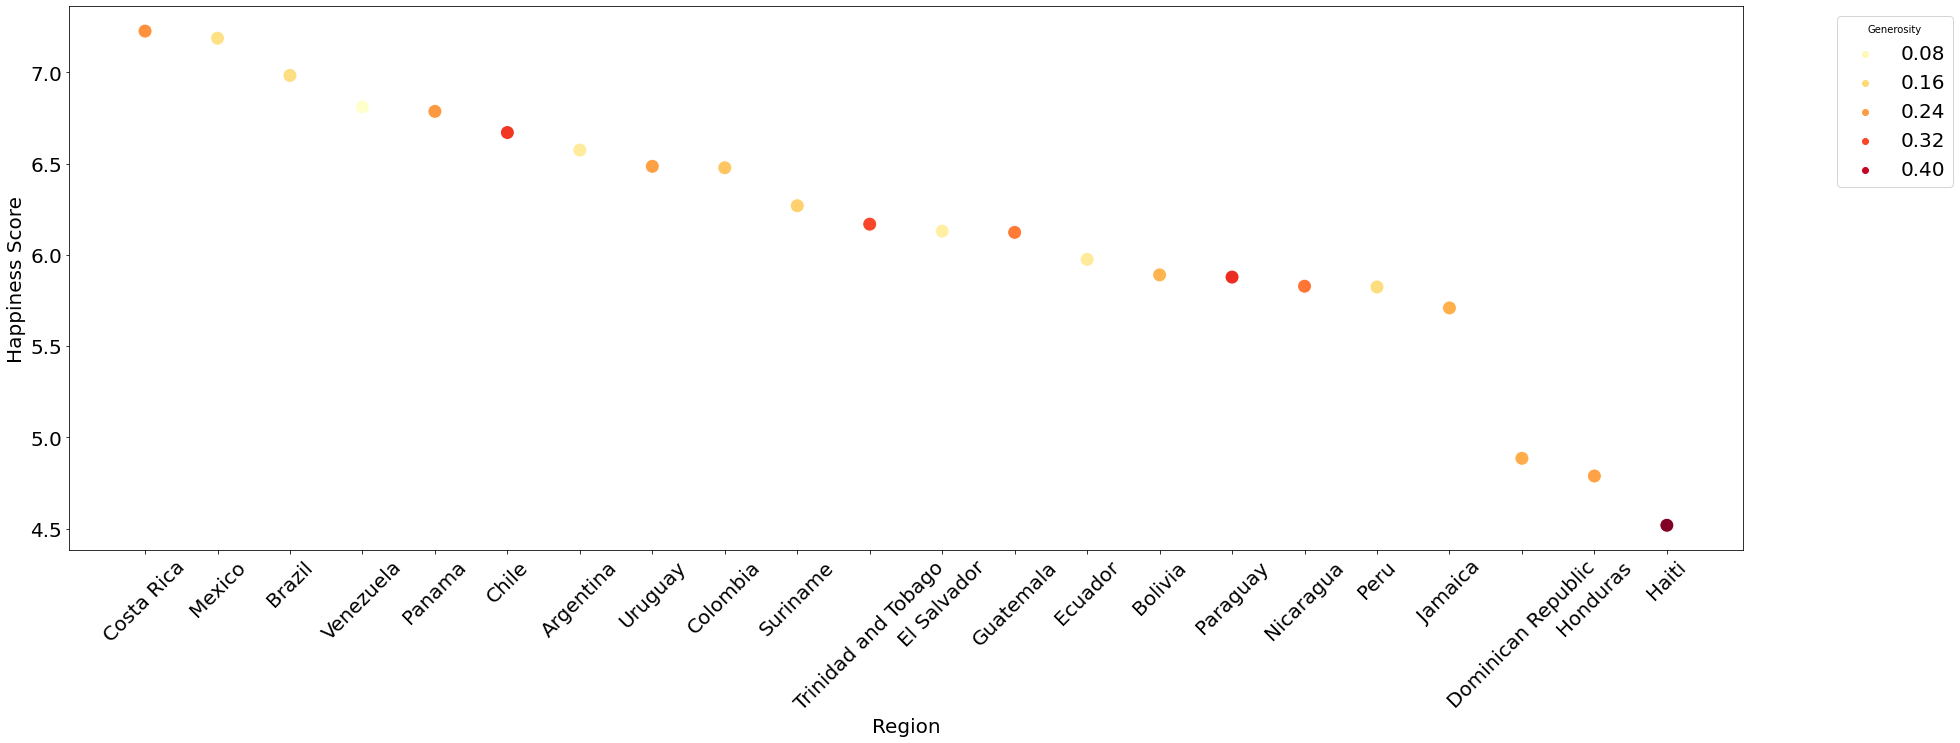

In [30]:
# let's check all parameter which telling in  " Latin America and Carribean" why Israel have good Happiness score than other 
for i in LAC_column:
    plt.figure(figsize=(30,10))
    ax=sns.scatterplot(y=happy_LAC['Happiness Score'],x=happy_LAC["Country"],hue=i, data=happy_LAC,palette="YlOrRd",s=200)
    plt.legend(title=i, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
    plt.xticks(fontsize=20,rotation=45)
    plt.yticks(fontsize=20)
    plt.ylabel("Happiness Score",fontsize=20)
    plt.xlabel("Region",fontsize=20)
    plt.show()

As from the above conclusion we find that  Costa rica performing good in all the above key parameter thst why people ofnthis country is happy and happiness score is also very good compare to other country but this region almost from "costa rica" to "paraguay" everybody having good happiness score in the table

<Figure size 720x1440 with 0 Axes>

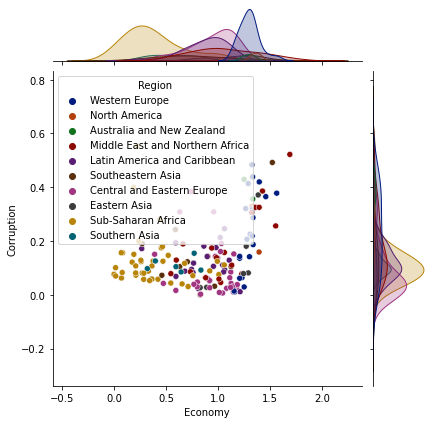

In [31]:
plt.figure(figsize=(10,20))
sns.jointplot(x="Economy",y="Corruption",hue="Region",data=happy,palette="dark")
plt.show()

As we can see Sub- Saharan Africa region have lower "Economy" and "high Corruption" as we ccan see from graph
as we can from the Grpah clealy show that Western Europe have good Economy and Corruption is also less Know the country eho have more Corruption means the country proplr in all suffer and there economy also effect so in overall it will affect mood and also it will affect the happiness index of a country

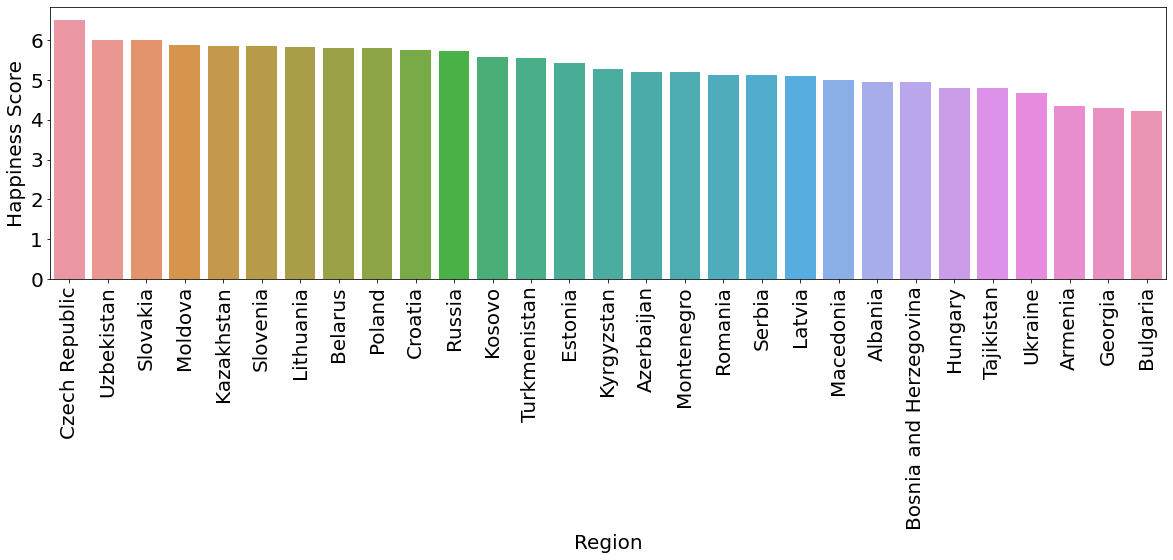

In [32]:
# lets use count plot see  " Central and Eastern Europe " 
plt.figure(figsize=(20,5))
ax=sns.barplot(y=happy_CEE['Happiness Score'],x=happy_CEE["Country"])
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.ylabel("Happiness Score",fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.show()

As we can see that from country "Czech Republic" to "Russia" in the region Central and eastern Europe havinh happiness index over 6 or Equal to 6 which is good 

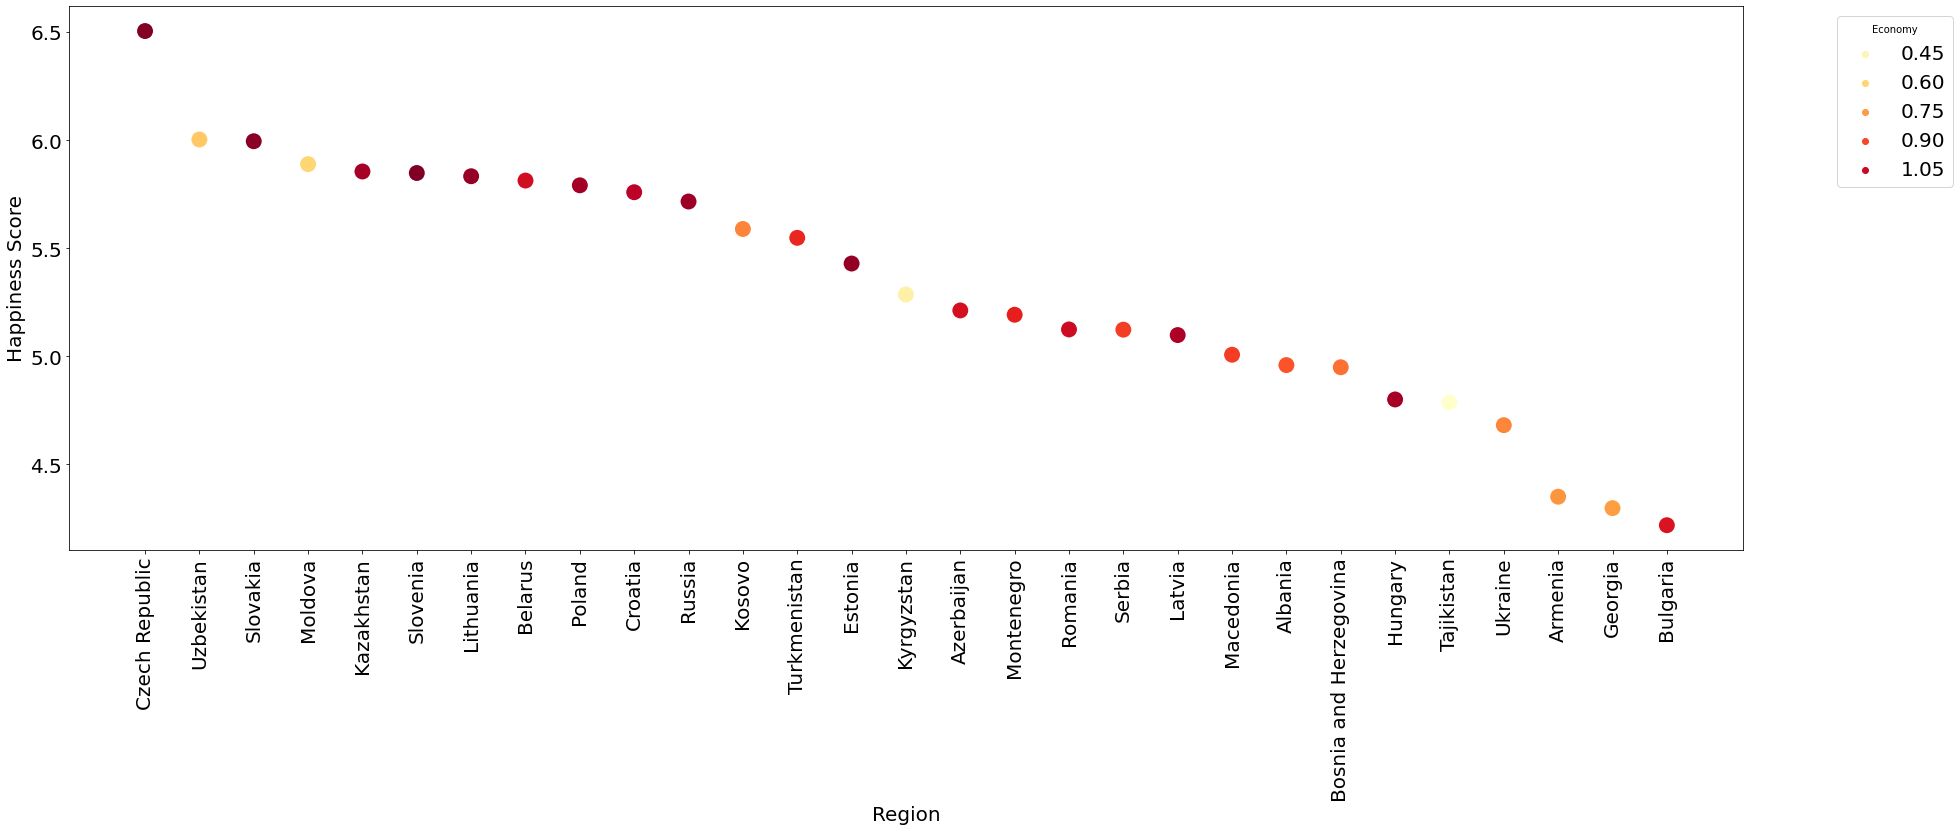

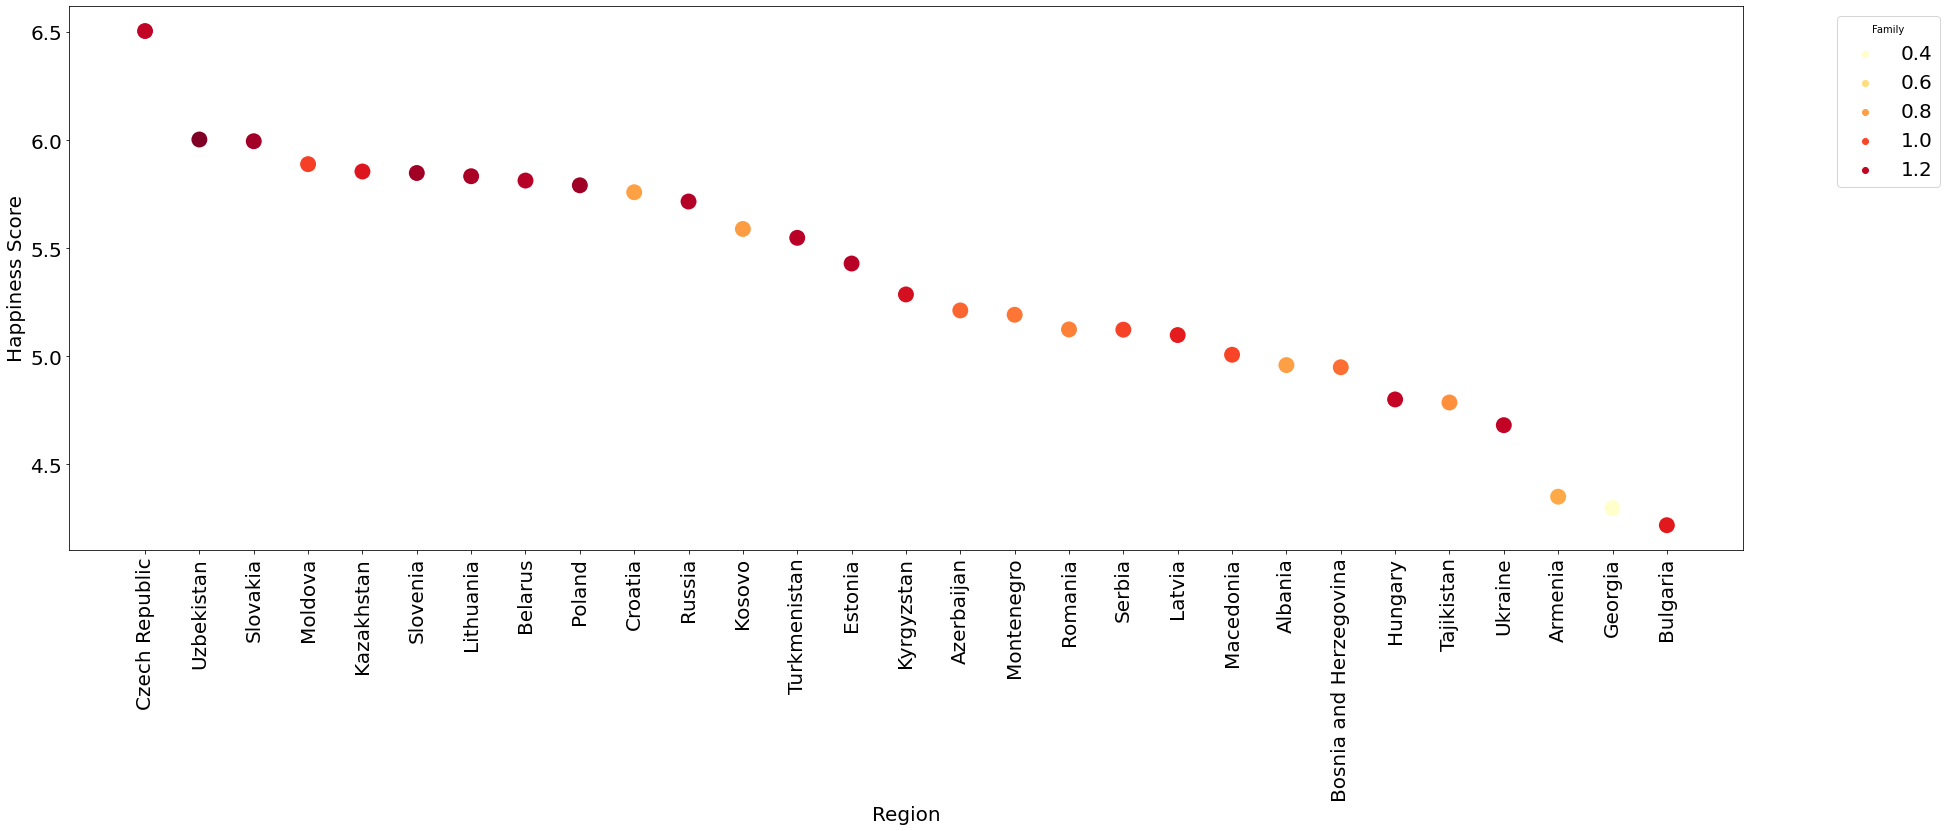

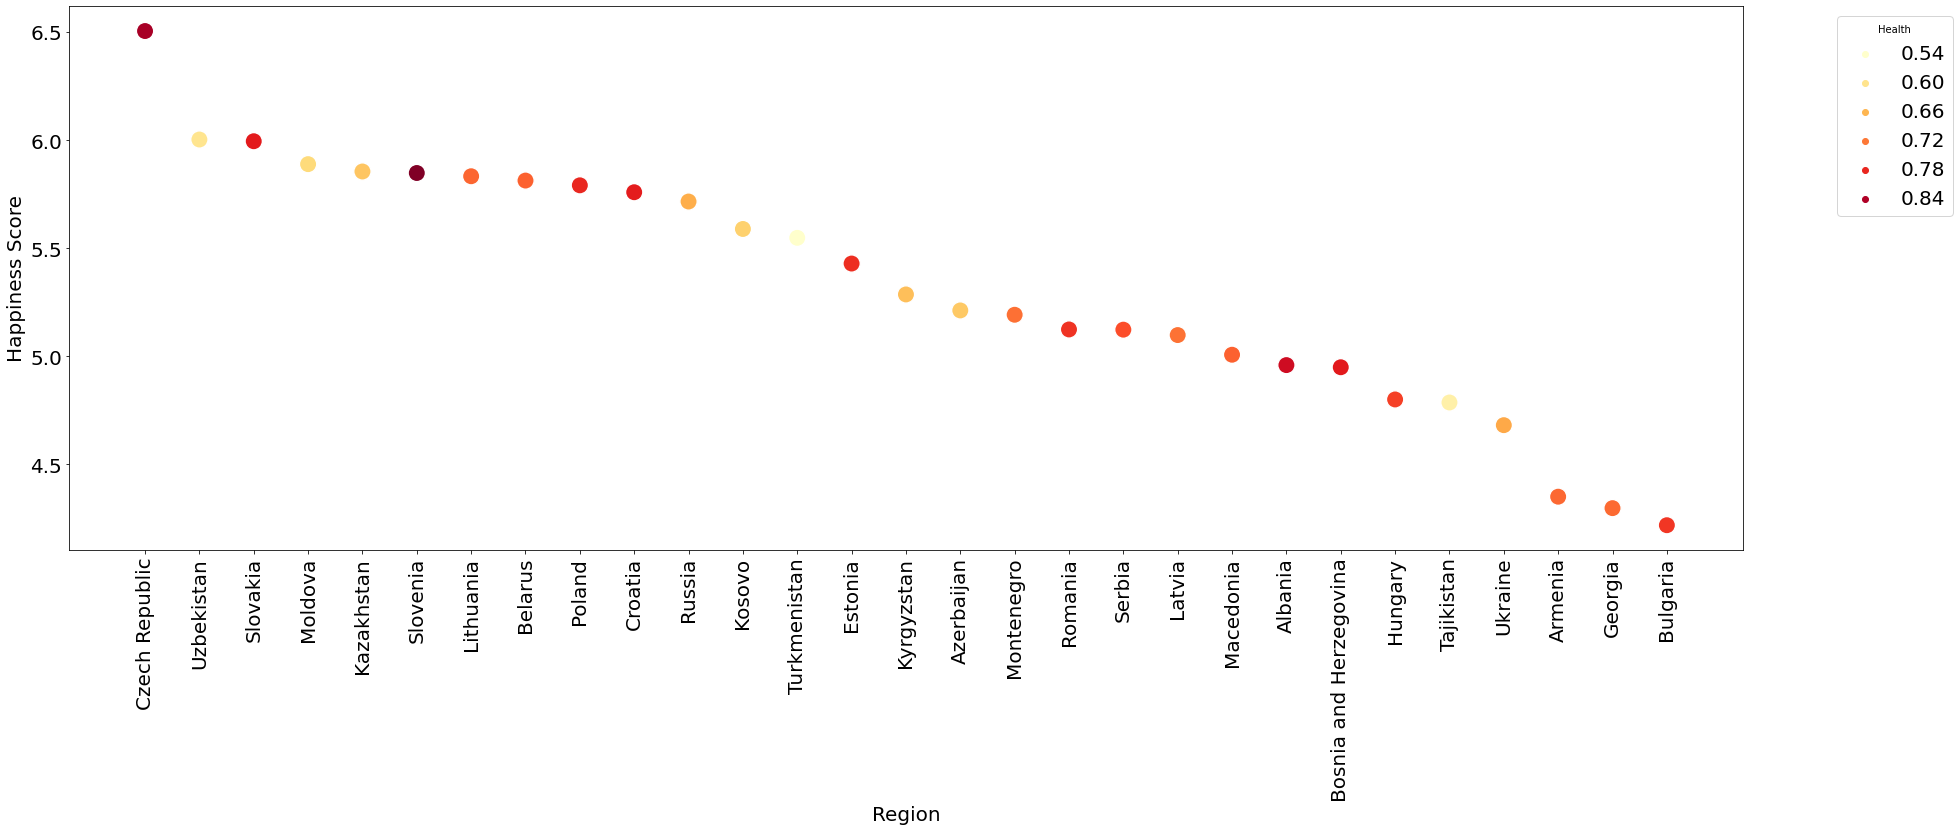

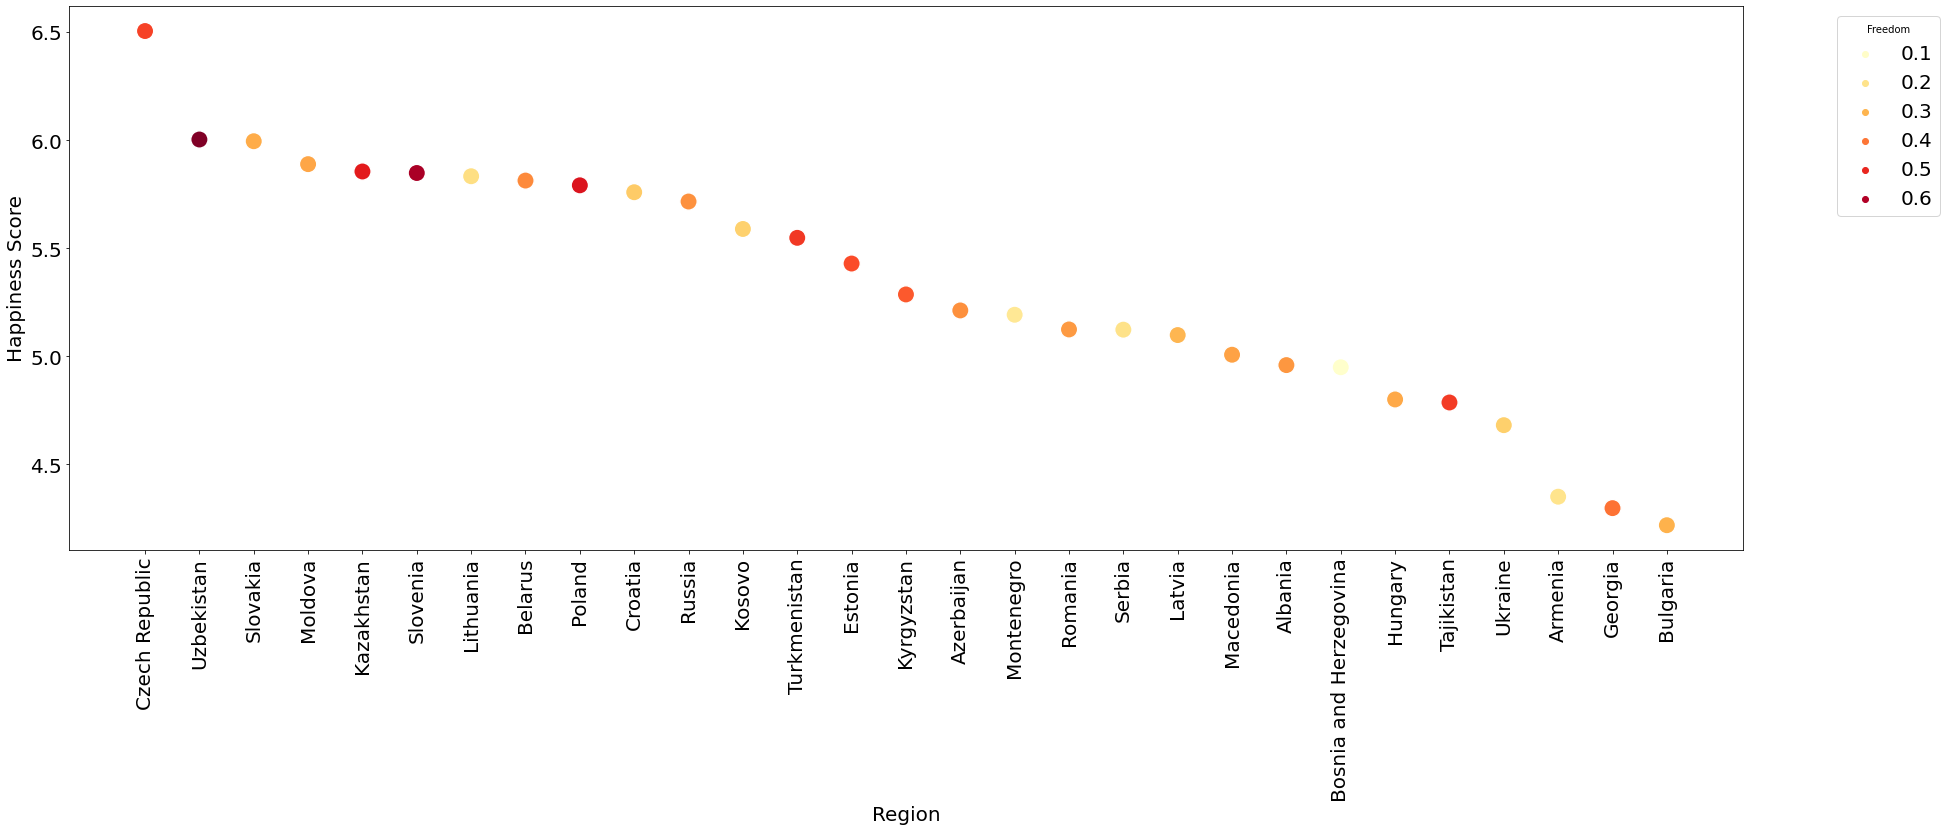

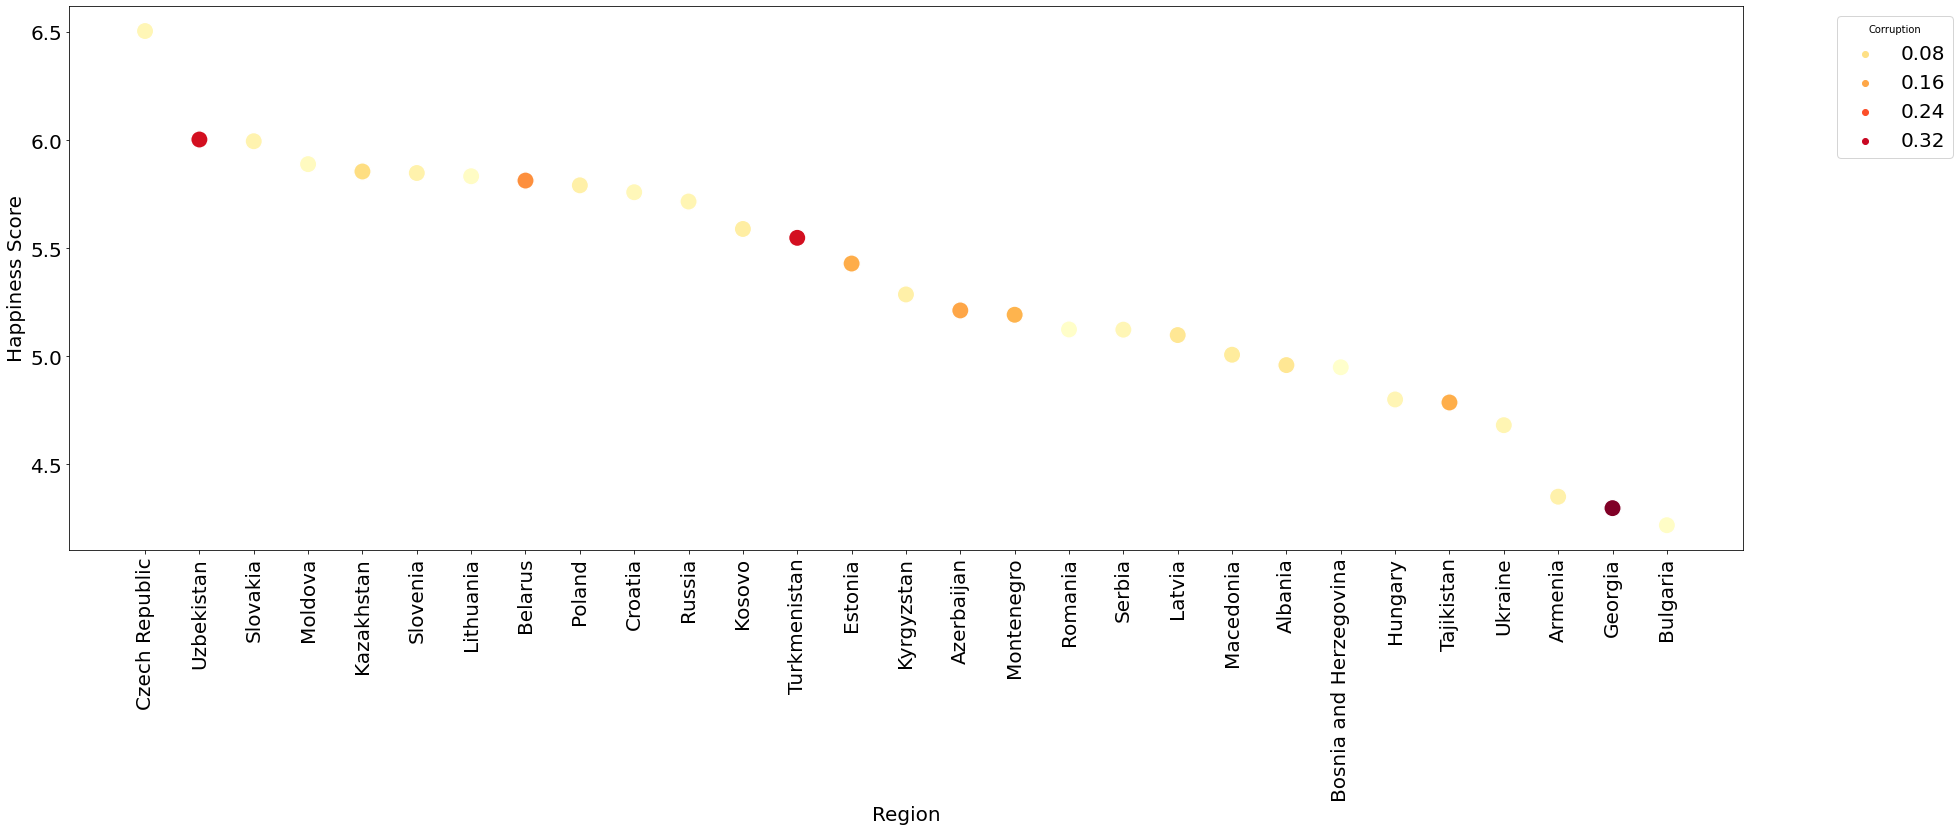

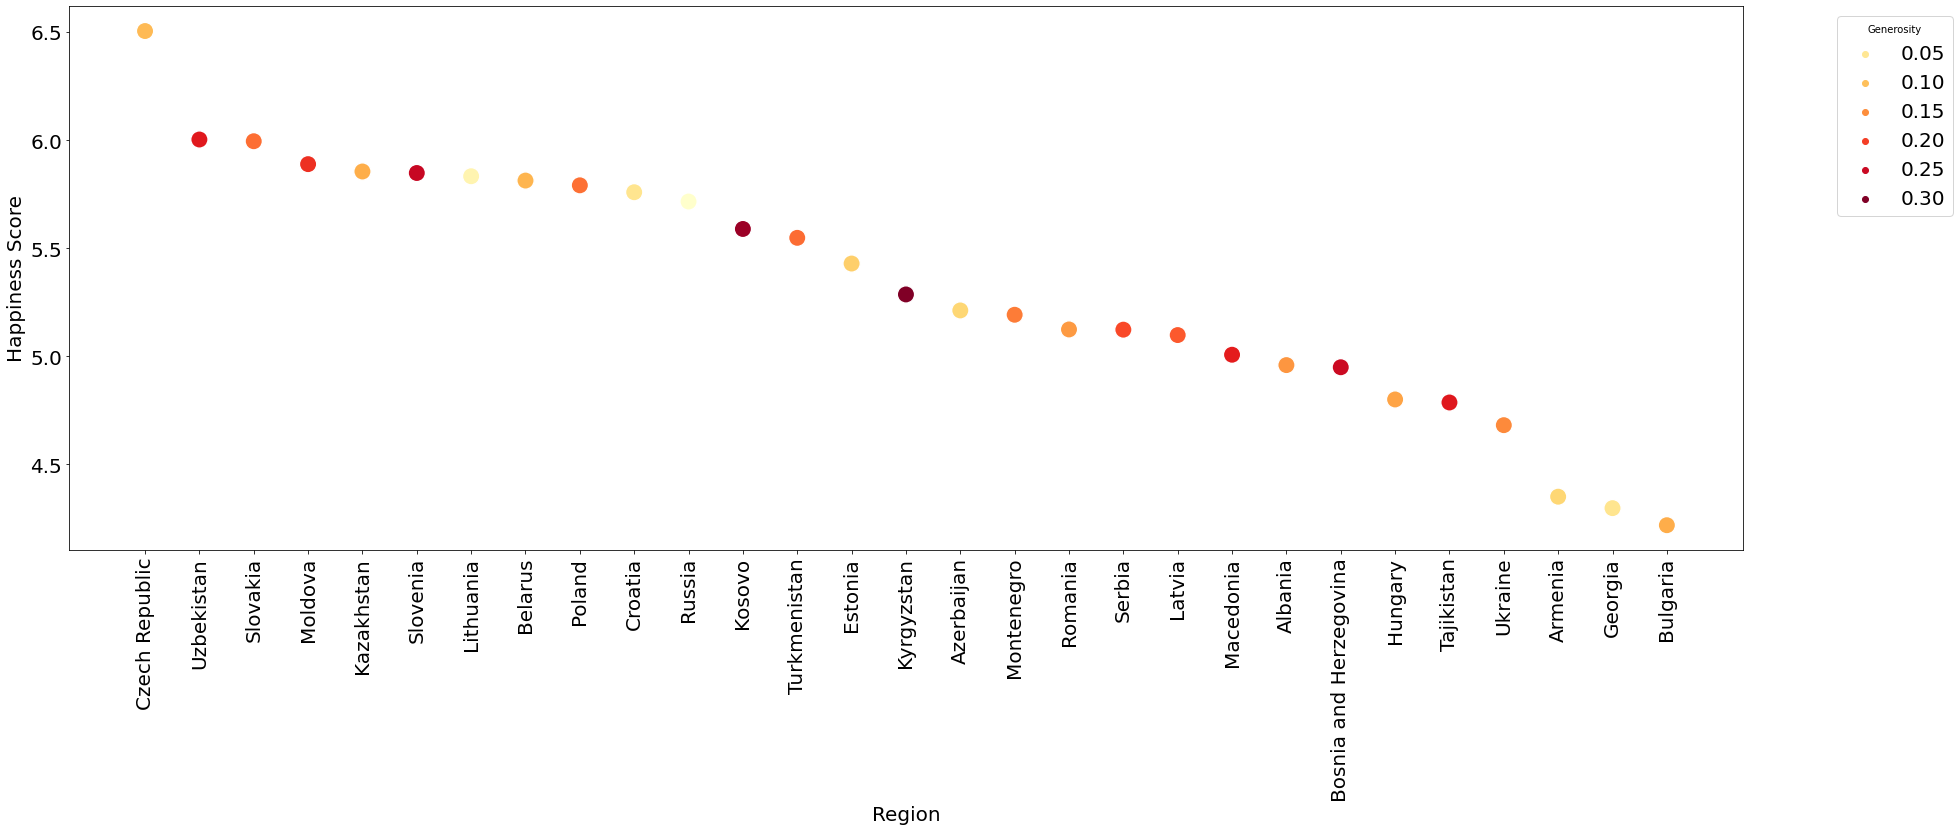

In [33]:
# let's check all parameter which telling in  " Latin America and Carribean" why Israel have good Happiness score than other 
for i in LAC_column:
    plt.figure(figsize=(30,10))
    ax=sns.scatterplot(y=happy_CEE['Happiness Score'],x=happy_CEE["Country"],hue=i, data=happy_CEE,palette="YlOrRd",s=300)
    plt.legend(title=i, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
    plt.xticks(fontsize=20,rotation=90)
    plt.yticks(fontsize=20)
    plt.ylabel("Happiness Score",fontsize=20)
    plt.xlabel("Region",fontsize=20)
    plt.show()

As we can clealry see that "Cezch Republic" perform outstanding country in trem of happiness because all the key parameter present are outstanding than other country that why "Cezch Republic" is on top in " Central and eastern Europe" region

# After Analyzing every region data with there key value parameter we caqn determine how they are affecting the Happiness score every cou try in region 

# 1. As we can see that "western Europe" region is outperforming every othewr region in terms of economy , corruption, freedom, generoristy,  etc that why this region maximum country comes between 1 to 50 rank because all there key parameter are better than other country in survey that why there rank also good and there pepole are also happy 

# 2. As fewer other region after doing Analysis we are Suprised to see "Latin America and Carribean " happines score that these country all have very good score above 6 even therer key value parameter have variuation some parameter are bad but some parameter are too good that balance there country happiness index score that;s why almost all country og this region have good score and people have very happy in this region 

# 3. Other countries who have bad score due to there key value parameter are not good in many key values due to which they not good happines score compared to other nations or region so if they look to improve the any  key values paramter  there happines score aslso increases

# Pre Processing steps

In [34]:
# let's see the correlation using HeatMap 
corr=happy.corr()
corr

,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Corruption,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


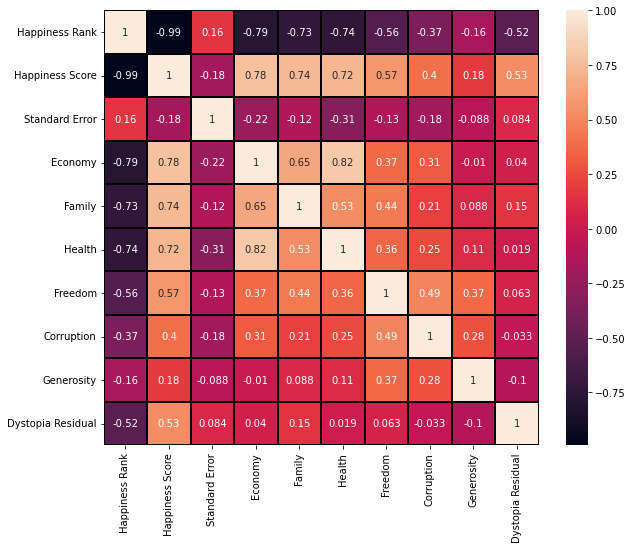

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,annot_kws={'size':10},linewidths=2,linecolor='black',square=True)
plt.show()

As we can see that "Economy-Family","Economy-health","happiness score- heslth", family-happiness score,"Economy-happiness score" are very highly correlated to each other as we cannot drop these column it is directly affecting our target variable score and our datset loose our important data

 Same as Happiness rank and standard error  with all other are negatively correlated to each other so we drop the happines rank later 

In [36]:
columns_to_drop = ['Country', 'Happiness Rank', 'Standard Error']
happy= happy.drop(columns_to_drop, axis=1)

In [37]:
happy

,Region,Happiness Score,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Now we drop the unessecary which are not contributing much to the target variable


In [38]:
# Now we have to apply Standard Scalar but before applying Standard Scaler we have to convert the categoriucal column to numerical column

from sklearn.preprocessing import LabelEncoder
categorical_coulmns=["Region"]
LE= LabelEncoder()
for column in categorical_coulmns:
    happy[column]=LE.fit_transform(happy[column])

In [39]:
happy

,Region,Happiness Score,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
0,9,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,9,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,9,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,9,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,9,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,9,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,9,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,0,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


As you can see we have converted our categorical column "region" to numerical column now we cam apply Standard Scalar

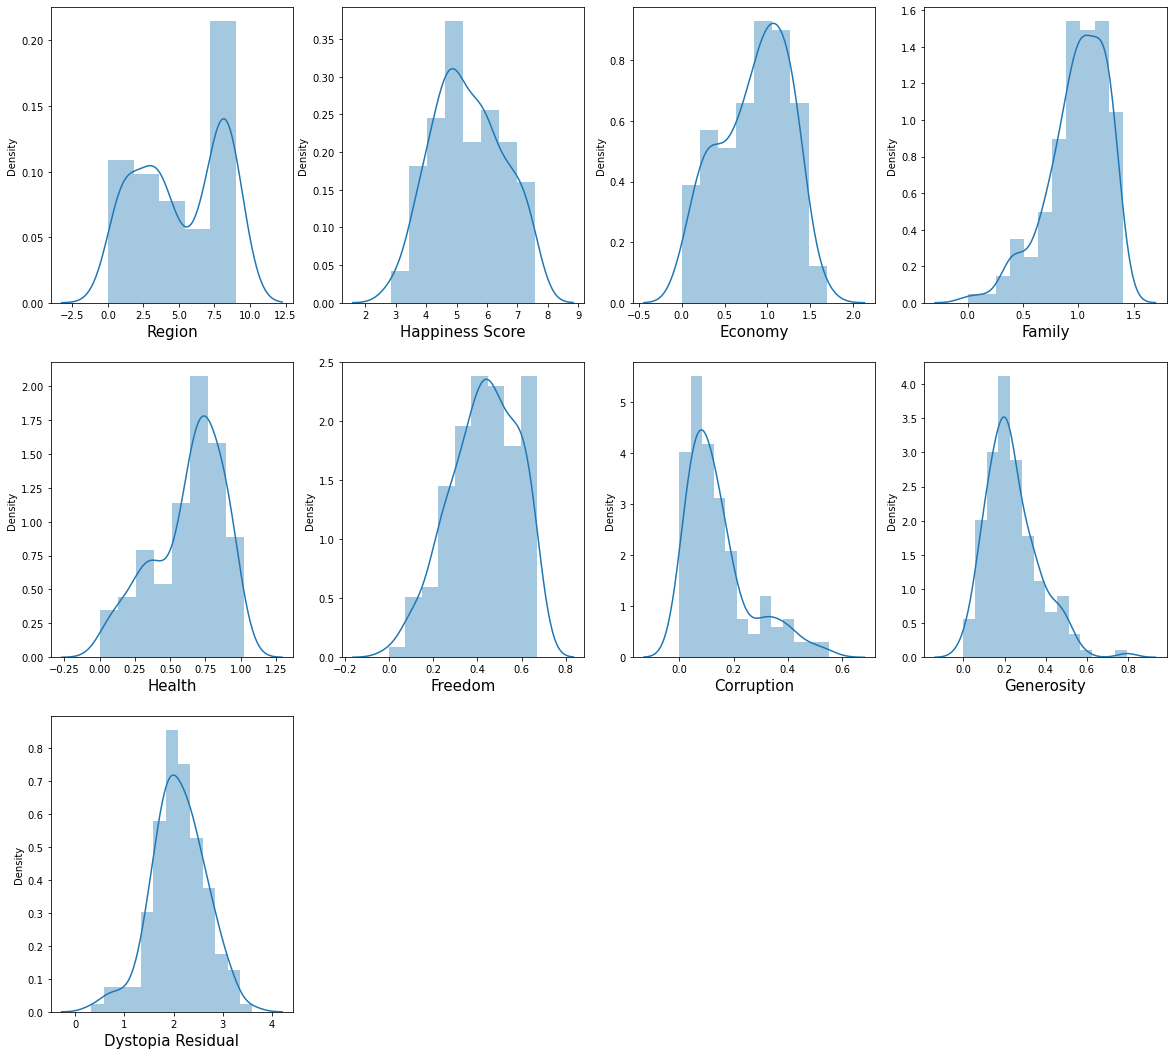

In [40]:
# Let's check Skweness through graph
# now after apllying label encoder let's see how data is distributed 
plt.figure(figsize=(20,25))
column=1
for columns in happy:
    if column <=10:
        plt.subplot(4,4,column)
        ax=sns.distplot(happy[columns])
        plt.xlabel(columns,fontsize=15)
    column+=1
plt.show()


Our dataset through Graph showing us that there is no skweness present in the datset but let's check thorugh skewness

In [41]:
happy.skew()

Region              -0.116119
Happiness Score      0.097769
Economy             -0.317575
Family              -1.006893
Health              -0.705328
Freedom             -0.413462
Corruption           1.385463
Generosity           1.001961
Dystopia Residual   -0.238911
dtype: float64

In [42]:
# Let's seprate our target variale and label variable
x=happy.drop(columns=["Happiness Score"])
y=happy["Happiness Score"]

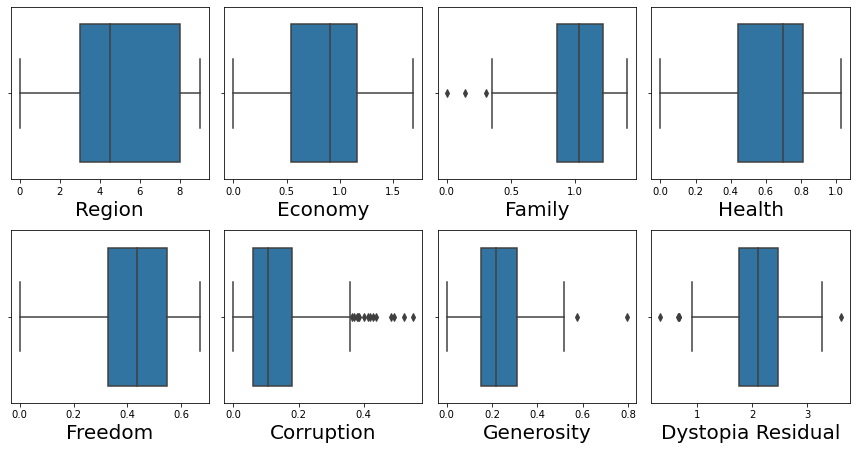

In [43]:
# let's plot Boxplot to check if there any outlierds present in the dataset
plt.figure(figsize=(12,12))
feature=1
for i in x:
    if feature <=9:
        plt.subplot(4,4,feature)
        ax=sns.boxplot(x[i])
        plt.xlabel(i,fontsize=20)
    feature+=1
plt.tight_layout()

Here we can see that Corruption and family have soe outliers

In [52]:
columnas= ['Corruption','Family']
Q1 = happy[columnas].quantile(0.25)
Q3= happy[columnas].quantile(0.75)
IQR = Q3 - Q1
threshold=1.5
outliers = happy[(happy[columnas] < Q1 - threshold * IQR) |
                         (happy[columnas] > Q3 + threshold * IQR)]
happy = happy.drop(outliers.index)

In [44]:
# let's check multicollinearrity with VIF but before that we have to scaled our data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled_values=scaler.fit_transform(x)
x_scaled_values

array([[ 1.30025593,  1.36962124,  1.32028142, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 1.30025593,  1.13522625,  1.51445776, ..., -0.01647953,
         1.57585637,  1.09285682],
       [ 1.30025593,  1.19286069,  1.36105403, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [-0.37544095, -0.45524543, -1.90108634, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 0.96511655, -2.06756644, -2.1184666 , ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 0.96511655, -1.58633379, -3.13472485, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [45]:
# now lets's check VIF values to find the mullticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(x_scaled_values, i) for i in range(x_scaled_values.shape[1])]
vif_data["faeture"]=x.columns

In [46]:
print(vif_data)

        VIF            faeture
0  1.374030             Region
1  4.120211            Economy
2  1.951038             Family
3  3.561285             Health
4  1.760807            Freedom
5  1.452348         Corruption
6  1.383893         Generosity
7  1.049649  Dystopia Residual


all we can finall see threshold having less than 5 thais why no mullticollinearity

In [47]:
column_to_transform='Corruption'
transformed_data = np.sqrt(happy[column_to_transform])
happy['Corruption'] = transformed_data

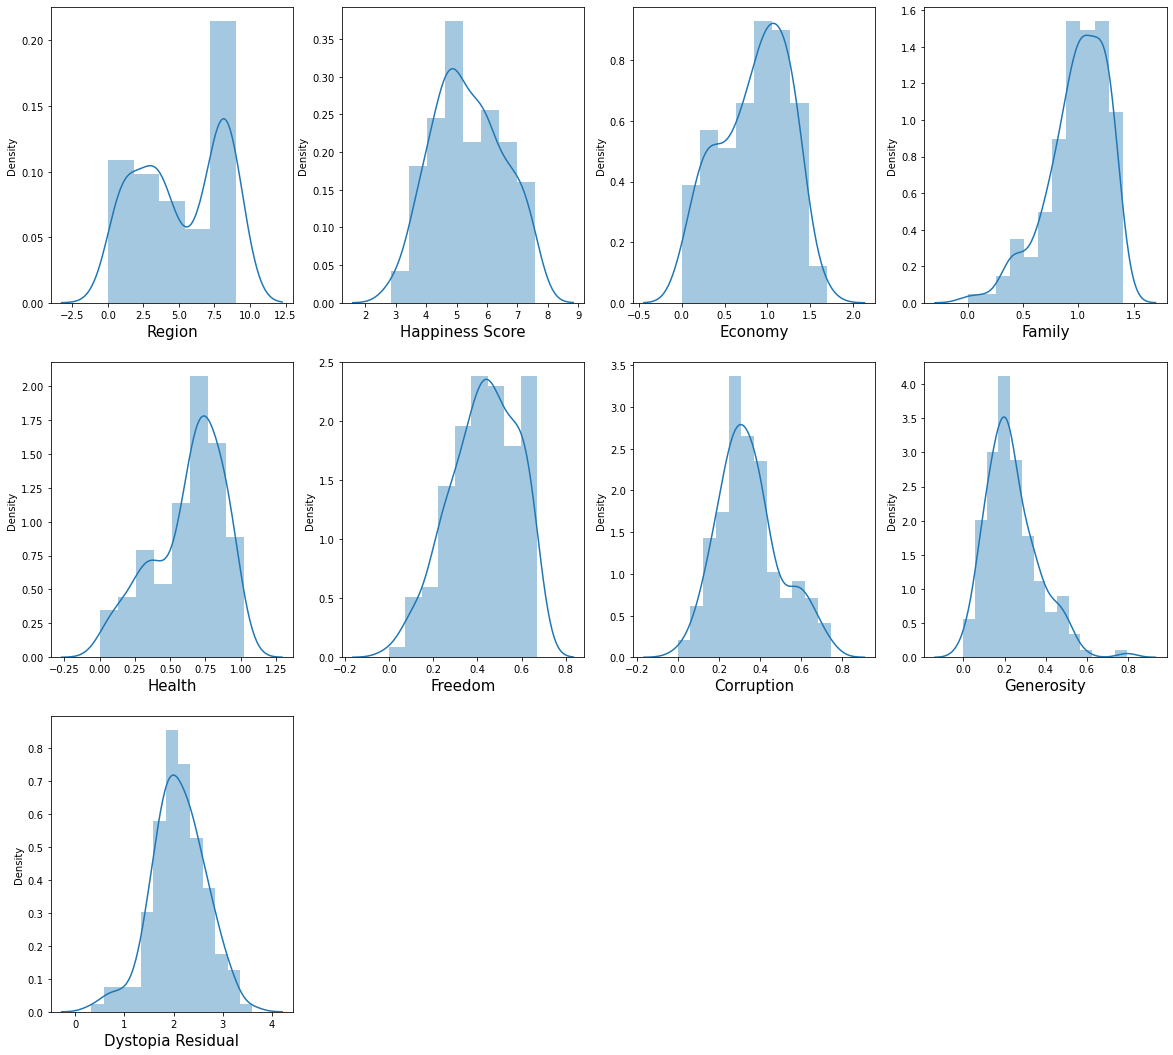

In [48]:
plt.figure(figsize=(20,25))
column=1
for columns in happy:
    if column <=10:
        plt.subplot(4,4,column)
        ax=sns.distplot(happy[columns])
        plt.xlabel(columns,fontsize=15)
    column+=1
plt.show()

as you can see that transformed_column for corruption is now perfectly bell - Shaped curve

# Now we Built our Machine Learning model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

# LINEAR REGRESSION

In [50]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,200):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=random_state)
        LR = LinearRegression()
        LR.fit(X_train, y_train)
        y_pred = LR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score

best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)


Best Random State  : 148
Best r2_score:-  99.99999660790516


In [51]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=148)
LR=LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train=LR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 99.99999247789539
mean_squared_error 6.114124428759522e-08
men absolute eroor 0.00021295476779145672
mean_squared_error 0.0002472675560755903


# RANDOM FOREST REGRESSION

In [52]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=random_state)
        RFR=RandomForestRegressor()
        RFR.fit(X_train, y_train)
        y_pred = RFR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 272
Best r2_score:-  96.31945566756968


In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=93)
RFR=RandomForestRegressor()
RFR.fit(X_train, y_train)
y_pred = RFR.predict(X_test)
y_pred_train=RFR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 98.44588992833746
mean_squared_error 0.05349392724374988
men absolute eroor 0.18986937499999978
mean_squared_error 0.23128754234448054


# DESCION TREE REGRESSOR

In [54]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=random_state)
        DTR=DecisionTreeRegressor()
        DTR.fit(X_train, y_train)
        y_pred = DTR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state
            

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)


Best Random State  : 221
Best r2_score:-  87.13718906983604


In [55]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=129)
DTR=DecisionTreeRegressor()
DTR.fit(X_train, y_train)
y_pred = DTR.predict(X_test)
y_pred_train=DTR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 100.0
mean_squared_error 0.21832924999999995
men absolute eroor 0.3594999999999999
mean_squared_error 0.46725715617847946


# GRADIENT BOSSTING REGRESSOR

In [56]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=random_state)
        GBR=GradientBoostingRegressor()
        GBR.fit(X_train, y_train)
        y_pred = GBR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 93
Best r2_score:-  96.94352639801046


In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=93)
GBR=GradientBoostingRegressor()
GBR.fit(X_train, y_train)
y_pred = GBR.predict(X_test)
y_pred_train=GBR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 99.92716485528088
mean_squared_error 0.0360661538843936
men absolute eroor 0.14234015481569087
mean_squared_error 0.18991091038798585


# EXTRA TREE REGRESSOR

In [58]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=random_state)
        ETR = ExtraTreesRegressor()
        ETR.fit(X_train, y_train)
        y_pred = ETR.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 87
Best r2_score:-  97.23491785337363


In [59]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=179)
ETR=ExtraTreesRegressor()
ETR.fit(X_train, y_train)
y_pred = ETR.predict(X_test)
y_pred_train=ETR.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 100.0
mean_squared_error 0.04089610911874995
men absolute eroor 0.16541354166666644
mean_squared_error 0.20222786434799223


In [60]:
from sklearn.linear_model import Lasso,Ridge

# RIDGE

In [61]:
def select_best_random_state(x_scaled_values, y):
    best_random_state =0
    best_r2_score =0

    for random_state in range(1,300):
        X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.3, random_state=random_state)
        rd = Ridge()
        rd.fit(X_train, y_train)
        y_pred = rd.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        if r2 > best_r2_score:
            best_r2_score = r2
            best_random_state = random_state

    return best_random_state, best_r2_score


best_random_state, best_r2_score= select_best_random_state(x_scaled_values, y)
print("Best Random State  :", best_random_state)
print("Best r2_score:- ",best_r2_score*100)

Best Random State  : 179
Best r2_score:-  99.99780251454206


In [62]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled_values, y, test_size=0.2, random_state=179)
rd=Ridge()
rd.fit(X_train, y_train)
y_pred = rd.predict(X_test)
y_pred_train=rd.predict(X_train)
print("r2_score om training dataset",r2_score(y_train,y_pred_train)*100)
print("mean_squared_error",mean_squared_error(y_test,y_pred))
print("men absolute eroor",mean_absolute_error(y_test,y_pred))
print("mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score om training dataset 99.99776766049413
mean_squared_error 1.431126587384791e-05
men absolute eroor 0.003005632844108
mean_squared_error 0.003783023377385859


# Now after doing all this we will do cross validation to test that our model overfitting or not 

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
cvr=cross_val_score(LR,x_scaled_values,y,cv=5)
print(cvr)


[0.99999948 0.99999843 0.99999829 0.99999551 0.99999937]


In [65]:
print(cvr.mean())

0.9999982163051799


Now let's check the differnece between original score of LinearRegression and cros validation score

In [71]:
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

differencve of r2_score and cross_val_score 345.2765703866344


In [72]:
cvr=cross_val_score(RFR,x_scaled_values,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-7.1469922  -0.97765281 -1.33774177 -1.35992518 -5.29921644]
-3.2243056799139964
differencve of r2_score and cross_val_score 422.4294393684337


In [73]:
cvr=cross_val_score(DTR,x_scaled_values,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-7.38896231 -6.92927577 -7.59149338 -9.62379298 -5.40170249]
-7.387045384738071
differencve of r2_score and cross_val_score 838.7034098508412


In [74]:
cvr=cross_val_score(GBR,x_scaled_values,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-3.96019504 -0.67013983 -2.43914508 -1.67634788 -3.56559732]
-2.4622850301348818
differencve of r2_score and cross_val_score 346.2273743905223


In [75]:
cvr=cross_val_score(ETR,x_scaled_values,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[-6.46342535  0.01926276 -1.19364031 -1.75976358 -4.8413273 ]
-2.8477787574919984
differencve of r2_score and cross_val_score 384.77674712623394


In [78]:
cvr=cross_val_score(rd,x_scaled_values,y,cv=5)
print(cvr)
print(cvr.mean())
print("differencve of r2_score and cross_val_score",(r2_score(y_pred,y_test)-cvr.mean())*100)

[0.99451269 0.99965575 0.9995494  0.99932102 0.99818939]
0.9982456495024099
differencve of r2_score and cross_val_score 0.1743064267931249


# From the above we can see that GBR having less differnce so GBR is our best model

Now we do hperparameter tunning to tune our model so it give high R2 _score

In [80]:
from sklearn.model_selection import GridSearchCV

In [90]:
params= {
    'n_estimators': [100],  # List of values to try for n_estimators
    'learning_rate': [0.2,0.1,0.3],
    'max_depth': [4,5,6],
    'min_samples_split': [3,2,5],
    'min_samples_leaf': [1,3,5],
    'loss': ['squared_error']
}

In [91]:
GSCV=GridSearchCV(GradientBoostingRegressor(),params,cv=5)

In [92]:
GSCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.1, 0.3],
                         'loss': ['squared_error'], 'max_depth': [4, 5, 6],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 2, 5],
                         'n_estimators': [100]})

In [93]:
GSCV.best_params_

{'learning_rate': 0.3,
 'loss': 'squared_error',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 100}

In [94]:
happy_model=GradientBoostingRegressor(n_estimators=100,max_depth=4,min_samples_leaf=5,loss="squared_error",learning_rate=0.3,min_samples_split=3)

In [95]:
happy_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=4, min_samples_leaf=5,
                          min_samples_split=3)

In [96]:
pred=happy_model.predict(X_test)

In [97]:
print("r2_score",r2_score(y_test,pred))
print("mean_squared_error",mean_squared_error(y_test,pred))
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print("root_mean_squared_error",np.sqrt(mean_squared_error(y_test,pred)))

r2_score 0.9427131287370677
mean_squared_error 0.07300305871431194
mean_absolute_error 0.20716761972343206
root_mean_squared_error 0.27019078206761965


In [98]:
import pickle
project_name="world hapiness report prediction.pkl"
pickle.dump(happy_model,open(project_name,'wb'))

In [99]:
import pickle
load_final_model=pickle.load(open('world hapiness report prediction.pkl','rb'))
final_result=load_final_model.score(X_test,y_test)
print(final_result*100)

94.27131287370678


In [100]:
target_variable_prediction=pd.DataFrame([load_final_model.predict(X_test)[:],y_test[:]],index=["predicted","original"])

In [101]:
target_variable_prediction

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
predicted,4.677945,5.526162,4.383433,3.620099,4.027101,3.771776,4.907413,6.130145,4.444983,5.591226,...,5.839573,7.013064,5.542176,5.451666,5.325372,5.995758,5.697013,4.375985,3.291268,3.801015
original,4.971000,5.791000,4.033000,3.656000,4.307000,3.655000,5.013000,5.770000,4.252000,5.889000,...,5.975000,6.940000,5.890000,5.192000,5.332000,5.960000,5.716000,4.610000,3.340000,3.575000


# Our final model is build and score was almost 94%